In [1]:
import smtpd
import warnings
import matplotlib.pyplot as plt
import pandas as pd
warnings.filterwarnings('ignore')
import scipy.stats.morestats
import matplotlib
from scipy.ndimage import gaussian_filter
from rsa_utils import *
import seaborn as sns
from metrics import *
from cebra_utils import *
from riab_utils import *
from dat import *
%matplotlib inline

In [2]:
sns.set(style='dark', font_scale=1.25)
p = r'/Users/jquinnlee/Desktop/georep_hipp'
os.chdir(p)

In [3]:
animals = ['QLAK-CA1-08', 'QLAK-CA1-30', 'QLAK-CA1-50', 'QLAK-CA1-51', 'QLAK-CA1-56', 'QLAK-CA1-74', 'QLAK-CA1-75']
animal = animals[2]

In [6]:
dat = load_dat(animal, os.path.join(p, "data"))

Loading preprocessed data for animal QLAK-CA1-50


#
## Simualte Grid cells, Place cells (naive model), and Boundary vector cells with RatInABox
## following observed animal trajectory

In [4]:
def plot_riab_example(animal="QLAK-CA1-08", p=r'/Users/jquinnlee/Desktop/georep_hipp', shape="square",
                      const=0.08, scalar=12):
    fps = 30
    behav_dict = joblib.load(os.path.join(p, 'behav_dict'))[animal]
    env_idx = np.amin(np.where(behav_dict["envs"] == shape)[0])
    position = behav_dict["position"][env_idx]
    position = 75 * 0.01 * (position / position.max())
    # position[1] *= -1
    # position[1] -= position[1].min()
    Env = Environment(params={'aspect': 1, 'scale': .75, 'dimensionality': '2D'})
    if shape:
        deform_environment(Env, shape)
    Ag = Agent(Env, params={"dt":1/fps})
    np.random.seed(2023)
    GC = GridCells(Ag, params={"n": 10,
                               "gridscale_distribution": "logarithmic",
                               "gridscale": (0.28, .73),
                               "orientation_distribution": "uniform",
                               "orientation": (0, 2 * np.pi),
                               "phase_offset_distribution": "uniform",
                               "phase_offset": (0, 2 * np.pi),  # degrees
                               "description": "three_shifted_cosines",
                               "min_fr": 0,
                               "max_fr": 1,
                               "name": "GridCells"})


    BVC = BoundaryVectorCells(Ag, params={"n": 10,
                                          "reference_frame": "allocentric",
                                          "tuning_distance_distribution": "uniform",
                                          "tuning_distance": (0, 0.85),
                                          "tuning_angle_distribution": "uniform",
                                          "sigma_distance": (const, scalar),
                                          "sigma_angle": (11.25, 11.25),
                                          "sigma_angle_distribution": "uniform",
                                          "dtheta": 2,
                                          "min_fr": 0,
                                          "max_fr": 1,
                                          "name": "BoundaryVectorCells",
                                          "color": "C2"})

    Ag.import_trajectory(times=[i/fps for i in range(position.shape[1])],
                         positions=position.T,
                         interpolate=False)
    # history is not imported with import trajecotry, and needs to be initialized
    for key in list(Ag.history.keys()):
        Ag.history[key] = [0]
    # Simulate
    T = position.shape[-1]
    # update first time step with actual data
    for i in range(int(1)):
        Ag.update()
    # then drop the zeros that was initialized with
    for key in list(Ag.history.keys()):
        Ag.history[key] = Ag.history[key][1:]
    # procede with actual updates for entire session
    for i in tqdm(range(1, int(T)), leave=True, position=0, desc='Stepping through updates'):
        Ag.update()
        # GC.update()
        BVC.update()

    ratinabox.stylize_plots()
    fig1, ax1 = Ag.plot_trajectory(color="changing", pointsize=2.5)
    plt.show()
    fig2, ax2 = BVC.plot_rate_map(chosen_neurons="10", method="history")
    plt.show()
    # fig, ax = GC.plot_rate_map(chosen_neurons="4", method="history")
    # fig, ax = BVC.plot_rate_timeseries(t_start=150, t_end=300, chosen_neurons="10", spikes=False)
    # fig, ax = GC.plot_rate_timeseries(t_start=150, t_end=300, chosen_neurons="10", spikes=False)
    return fig1, fig2

Successfully imported dataset from arrays passed
Total of 2395.5 s of data available


Stepping through updates: 100%|██████████| 71865/71865 [00:17<00:00, 4040.57it/s]


    • To AUTOMATICALLY save all plots (recommended), set  `ratinabox.autosave_plots = True`
    • To MANUALLY save plots, call                        `ratinabox.utils.save_figure(figure_object, save_title).
      This warning will not be shown again


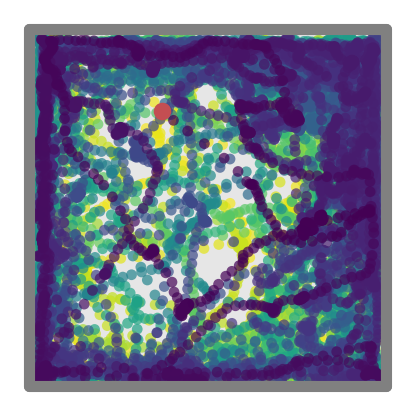

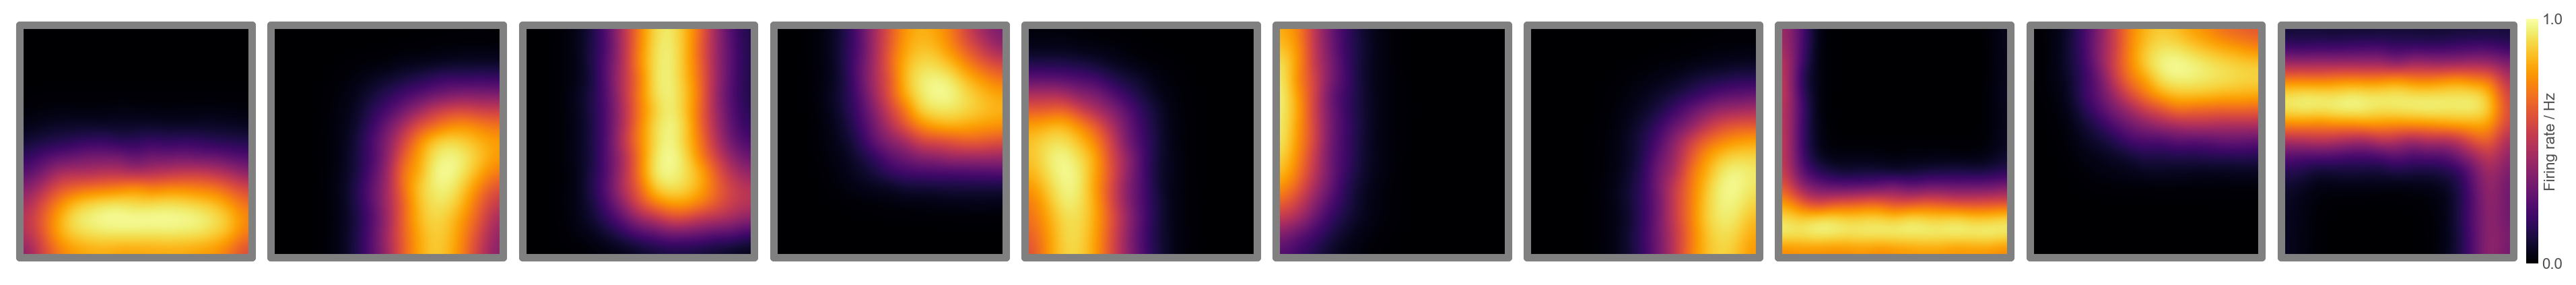

(<Figure size 375x375 with 1 Axes>, <Figure size 3750x375 with 20 Axes>)

In [5]:
plot_riab_example(animal, p=os.path.join(p, "data"))

## Simulate population of grid cells, boundary vector cells, and naive place cells with rate in a box across all days for example animal

In [10]:
# simulate model predictions from real animal trajectories using ratinabox
n_features = 200
# simulate and save agent and basis set using ratinabox for target animals
bases = ["GC", "BVC", "PC"]
for basis in bases:
    simulate_bases([animal], n_features, bases=[basis], p=os.path.join(p, "data"))

Simulating spike data across days: 0it [00:00, ?it/s]

Successfully imported dataset from arrays passed
Total of 2395.5 s of data available


Stepping through updates: 100%|██████████| 71865/71865 [00:07<00:00, 9547.34it/s] 
Simulating spike data across days: 1it [00:08,  8.02s/it]

Successfully imported dataset from arrays passed
Total of 2395.5 s of data available


Stepping through updates: 100%|██████████| 71865/71865 [00:07<00:00, 10136.89it/s]
Simulating spike data across days: 2it [00:15,  7.76s/it]

Successfully imported dataset from arrays passed
Total of 2395.5 s of data available


Stepping through updates: 100%|██████████| 71865/71865 [00:07<00:00, 9978.41it/s] 
Simulating spike data across days: 3it [00:23,  7.73s/it]

Successfully imported dataset from arrays passed
Total of 2395.5 s of data available


Stepping through updates: 100%|██████████| 71865/71865 [00:07<00:00, 10062.35it/s]
Simulating spike data across days: 4it [00:30,  7.70s/it]

Successfully imported dataset from arrays passed
Total of 2395.5 s of data available


Stepping through updates: 100%|██████████| 71865/71865 [00:07<00:00, 9533.33it/s] 
Simulating spike data across days: 5it [00:38,  7.82s/it]

Successfully imported dataset from arrays passed
Total of 2395.5 s of data available


Stepping through updates: 100%|██████████| 71865/71865 [00:07<00:00, 9755.88it/s] 
Simulating spike data across days: 6it [00:46,  7.83s/it]

Successfully imported dataset from arrays passed
Total of 2395.5 s of data available


Stepping through updates: 100%|██████████| 71865/71865 [00:07<00:00, 9521.72it/s]
Simulating spike data across days: 7it [00:54,  7.90s/it]

Successfully imported dataset from arrays passed
Total of 2395.5 s of data available


Stepping through updates: 100%|██████████| 71865/71865 [00:07<00:00, 9366.59it/s]
Simulating spike data across days: 8it [01:03,  7.99s/it]

Successfully imported dataset from arrays passed
Total of 2395.5 s of data available


Stepping through updates: 100%|██████████| 71865/71865 [00:07<00:00, 9417.77it/s]
Simulating spike data across days: 9it [01:11,  8.03s/it]

Successfully imported dataset from arrays passed
Total of 2395.5 s of data available


Stepping through updates: 100%|██████████| 71865/71865 [00:07<00:00, 9466.17it/s]
Simulating spike data across days: 10it [01:19,  8.05s/it]

Successfully imported dataset from arrays passed
Total of 2395.5 s of data available


Stepping through updates: 100%|██████████| 71865/71865 [00:07<00:00, 9389.55it/s]
Simulating spike data across days: 11it [01:27,  8.08s/it]

Successfully imported dataset from arrays passed
Total of 2395.5 s of data available


Stepping through updates: 100%|██████████| 71865/71865 [00:07<00:00, 9544.13it/s]
Simulating spike data across days: 12it [01:35,  8.07s/it]

Successfully imported dataset from arrays passed
Total of 2395.5 s of data available


Stepping through updates: 100%|██████████| 71865/71865 [00:07<00:00, 9440.95it/s]
Simulating spike data across days: 13it [01:43,  8.07s/it]

Successfully imported dataset from arrays passed
Total of 2395.5 s of data available


Stepping through updates: 100%|██████████| 71865/71865 [00:07<00:00, 9416.14it/s]
Simulating spike data across days: 14it [01:51,  8.09s/it]

Successfully imported dataset from arrays passed
Total of 2395.5 s of data available


Stepping through updates: 100%|██████████| 71865/71865 [00:07<00:00, 9368.09it/s]
Simulating spike data across days: 15it [01:59,  8.10s/it]

Successfully imported dataset from arrays passed
Total of 2395.5 s of data available


Stepping through updates: 100%|██████████| 71865/71865 [00:07<00:00, 9578.38it/s]
Simulating spike data across days: 16it [02:07,  8.07s/it]

Successfully imported dataset from arrays passed
Total of 2395.5 s of data available


Stepping through updates: 100%|██████████| 71865/71865 [00:07<00:00, 9460.86it/s] 
Simulating spike data across days: 17it [02:15,  8.08s/it]

Successfully imported dataset from arrays passed
Total of 2395.5 s of data available


Stepping through updates: 100%|██████████| 71865/71865 [00:07<00:00, 9664.71it/s] 
Simulating spike data across days: 18it [02:23,  8.03s/it]

Successfully imported dataset from arrays passed
Total of 2395.5 s of data available


Stepping through updates: 100%|██████████| 71865/71865 [00:07<00:00, 9591.64it/s] 
Simulating spike data across days: 19it [02:31,  8.01s/it]

Successfully imported dataset from arrays passed
Total of 2395.5 s of data available


Stepping through updates: 100%|██████████| 71865/71865 [00:07<00:00, 9546.79it/s] 
Simulating spike data across days: 20it [02:39,  8.01s/it]

Successfully imported dataset from arrays passed
Total of 2395.5 s of data available


Stepping through updates: 100%|██████████| 71865/71865 [00:07<00:00, 9691.33it/s] 
Simulating spike data across days: 21it [02:47,  7.98s/it]

Successfully imported dataset from arrays passed
Total of 2395.5 s of data available


Stepping through updates: 100%|██████████| 71865/71865 [00:07<00:00, 9560.62it/s]
Simulating spike data across days: 22it [02:55,  7.98s/it]

Successfully imported dataset from arrays passed
Total of 2395.5 s of data available


Stepping through updates: 100%|██████████| 71865/71865 [00:07<00:00, 9560.95it/s] 
Simulating spike data across days: 23it [03:03,  7.99s/it]

Successfully imported dataset from arrays passed
Total of 2395.5 s of data available


Stepping through updates: 100%|██████████| 71865/71865 [00:07<00:00, 9587.47it/s] 
Simulating spike data across days: 24it [03:11,  7.99s/it]

Successfully imported dataset from arrays passed
Total of 2395.5 s of data available


Stepping through updates: 100%|██████████| 71865/71865 [00:07<00:00, 9622.50it/s] 
Simulating spike data across days: 25it [03:19,  7.98s/it]

Successfully imported dataset from arrays passed
Total of 2395.5 s of data available


Stepping through updates: 100%|██████████| 71865/71865 [00:07<00:00, 9597.76it/s] 
Simulating spike data across days: 26it [03:27,  7.98s/it]

Successfully imported dataset from arrays passed
Total of 2395.5 s of data available


Stepping through updates: 100%|██████████| 71865/71865 [00:07<00:00, 9561.25it/s] 
Simulating spike data across days: 27it [03:35,  7.99s/it]

Successfully imported dataset from arrays passed
Total of 2395.5 s of data available


Stepping through updates: 100%|██████████| 71865/71865 [00:07<00:00, 9448.44it/s]
Simulating spike data across days: 28it [03:43,  8.02s/it]

Successfully imported dataset from arrays passed
Total of 2395.5 s of data available


Stepping through updates: 100%|██████████| 71865/71865 [00:07<00:00, 9530.11it/s] 
Simulating spike data across days: 29it [03:51,  8.02s/it]

Successfully imported dataset from arrays passed
Total of 2395.5 s of data available


Stepping through updates: 100%|██████████| 71865/71865 [00:07<00:00, 9687.07it/s] 
Simulating spike data across days: 30it [03:59,  7.99s/it]

Successfully imported dataset from arrays passed
Total of 2395.5 s of data available


Stepping through updates: 100%|██████████| 71865/71865 [00:07<00:00, 9518.89it/s] 
Simulating spike data across days: 31it [04:07,  7.99s/it]


Animal QLAK-CA1-50 basis set completed and saved!


Simulating spike data across days: 0it [00:00, ?it/s]

Successfully imported dataset from arrays passed
Total of 2395.5 s of data available


Stepping through updates: 100%|██████████| 71865/71865 [01:00<00:00, 1188.11it/s]
Simulating spike data across days: 1it [01:01, 61.33s/it]

Successfully imported dataset from arrays passed
Total of 2395.5 s of data available


Stepping through updates: 100%|██████████| 71865/71865 [01:06<00:00, 1078.05it/s]
Simulating spike data across days: 2it [02:08, 64.76s/it]

Successfully imported dataset from arrays passed
Total of 2395.5 s of data available


Stepping through updates: 100%|██████████| 71865/71865 [01:06<00:00, 1078.91it/s]
Simulating spike data across days: 3it [03:15, 65.82s/it]

Successfully imported dataset from arrays passed
Total of 2395.5 s of data available


Stepping through updates: 100%|██████████| 71865/71865 [01:05<00:00, 1097.63it/s]
Simulating spike data across days: 4it [04:21, 65.88s/it]

Successfully imported dataset from arrays passed
Total of 2395.5 s of data available


Stepping through updates: 100%|██████████| 71865/71865 [01:04<00:00, 1111.20it/s]
Simulating spike data across days: 5it [05:26, 65.62s/it]

Successfully imported dataset from arrays passed
Total of 2395.5 s of data available


Stepping through updates: 100%|██████████| 71865/71865 [01:03<00:00, 1127.21it/s]
Simulating spike data across days: 6it [06:30, 65.15s/it]

Successfully imported dataset from arrays passed
Total of 2395.5 s of data available


Stepping through updates: 100%|██████████| 71865/71865 [01:01<00:00, 1172.04it/s]
Simulating spike data across days: 7it [07:32, 64.06s/it]

Successfully imported dataset from arrays passed
Total of 2395.5 s of data available


Stepping through updates: 100%|██████████| 71865/71865 [01:04<00:00, 1111.49it/s]
Simulating spike data across days: 8it [08:37, 64.40s/it]

Successfully imported dataset from arrays passed
Total of 2395.5 s of data available


Stepping through updates: 100%|██████████| 71865/71865 [01:05<00:00, 1101.18it/s]
Simulating spike data across days: 9it [09:43, 64.82s/it]

Successfully imported dataset from arrays passed
Total of 2395.5 s of data available


Stepping through updates: 100%|██████████| 71865/71865 [01:02<00:00, 1146.09it/s]
Simulating spike data across days: 10it [10:46, 64.31s/it]

Successfully imported dataset from arrays passed
Total of 2395.5 s of data available


Stepping through updates: 100%|██████████| 71865/71865 [01:00<00:00, 1191.21it/s]
Simulating spike data across days: 11it [11:47, 63.24s/it]

Successfully imported dataset from arrays passed
Total of 2395.5 s of data available


Stepping through updates: 100%|██████████| 71865/71865 [01:06<00:00, 1088.32it/s]
Simulating spike data across days: 12it [12:54, 64.24s/it]

Successfully imported dataset from arrays passed
Total of 2395.5 s of data available


Stepping through updates: 100%|██████████| 71865/71865 [01:05<00:00, 1091.03it/s]
Simulating spike data across days: 13it [14:00, 64.88s/it]

Successfully imported dataset from arrays passed
Total of 2395.5 s of data available


Stepping through updates: 100%|██████████| 71865/71865 [01:03<00:00, 1129.69it/s]
Simulating spike data across days: 14it [15:04, 64.64s/it]

Successfully imported dataset from arrays passed
Total of 2395.5 s of data available


Stepping through updates: 100%|██████████| 71865/71865 [01:05<00:00, 1092.41it/s]
Simulating spike data across days: 15it [16:10, 65.12s/it]

Successfully imported dataset from arrays passed
Total of 2395.5 s of data available


Stepping through updates: 100%|██████████| 71865/71865 [01:03<00:00, 1124.89it/s]
Simulating spike data across days: 16it [17:15, 64.90s/it]

Successfully imported dataset from arrays passed
Total of 2395.5 s of data available


Stepping through updates: 100%|██████████| 71865/71865 [01:01<00:00, 1177.60it/s]
Simulating spike data across days: 17it [18:16, 63.88s/it]

Successfully imported dataset from arrays passed
Total of 2395.5 s of data available


Stepping through updates: 100%|██████████| 71865/71865 [01:05<00:00, 1101.69it/s]
Simulating spike data across days: 18it [19:22, 64.43s/it]

Successfully imported dataset from arrays passed
Total of 2395.5 s of data available


Stepping through updates: 100%|██████████| 71865/71865 [01:05<00:00, 1095.94it/s]
Simulating spike data across days: 19it [20:28, 64.92s/it]

Successfully imported dataset from arrays passed
Total of 2395.5 s of data available


Stepping through updates: 100%|██████████| 71865/71865 [01:02<00:00, 1152.62it/s]
Simulating spike data across days: 20it [21:31, 64.29s/it]

Successfully imported dataset from arrays passed
Total of 2395.5 s of data available


Stepping through updates: 100%|██████████| 71865/71865 [00:59<00:00, 1199.26it/s]
Simulating spike data across days: 21it [22:31, 63.12s/it]

Successfully imported dataset from arrays passed
Total of 2395.5 s of data available


Stepping through updates: 100%|██████████| 71865/71865 [01:10<00:00, 1020.04it/s]
Simulating spike data across days: 22it [23:42, 65.47s/it]

Successfully imported dataset from arrays passed
Total of 2395.5 s of data available


Stepping through updates: 100%|██████████| 71865/71865 [01:05<00:00, 1091.02it/s]
Simulating spike data across days: 23it [24:48, 65.74s/it]

Successfully imported dataset from arrays passed
Total of 2395.5 s of data available


Stepping through updates: 100%|██████████| 71865/71865 [01:04<00:00, 1110.78it/s]
Simulating spike data across days: 24it [25:54, 65.57s/it]

Successfully imported dataset from arrays passed
Total of 2395.5 s of data available


Stepping through updates: 100%|██████████| 71865/71865 [01:03<00:00, 1127.53it/s]
Simulating spike data across days: 25it [26:58, 65.16s/it]

Successfully imported dataset from arrays passed
Total of 2395.5 s of data available


Stepping through updates: 100%|██████████| 71865/71865 [01:03<00:00, 1129.03it/s]
Simulating spike data across days: 26it [28:02, 64.85s/it]

Successfully imported dataset from arrays passed
Total of 2395.5 s of data available


Stepping through updates: 100%|██████████| 71865/71865 [01:01<00:00, 1176.60it/s]
Simulating spike data across days: 27it [29:04, 63.86s/it]

Successfully imported dataset from arrays passed
Total of 2395.5 s of data available


Stepping through updates: 100%|██████████| 71865/71865 [01:03<00:00, 1129.45it/s]
Simulating spike data across days: 28it [30:08, 63.93s/it]

Successfully imported dataset from arrays passed
Total of 2395.5 s of data available


Stepping through updates: 100%|██████████| 71865/71865 [01:06<00:00, 1077.02it/s]
Simulating spike data across days: 29it [31:15, 64.92s/it]

Successfully imported dataset from arrays passed
Total of 2395.5 s of data available


Stepping through updates: 100%|██████████| 71865/71865 [01:02<00:00, 1144.08it/s]
Simulating spike data across days: 30it [32:18, 64.43s/it]

Successfully imported dataset from arrays passed
Total of 2395.5 s of data available


Stepping through updates: 100%|██████████| 71865/71865 [01:01<00:00, 1169.45it/s]
Simulating spike data across days: 31it [33:20, 64.54s/it]


Animal QLAK-CA1-50 basis set completed and saved!


Simulating spike data across days: 0it [00:00, ?it/s]

Successfully imported dataset from arrays passed
Total of 2395.5 s of data available


Stepping through updates: 100%|██████████| 71865/71865 [00:05<00:00, 12246.51it/s]
Simulating spike data across days: 1it [00:06,  6.36s/it]

Successfully imported dataset from arrays passed
Total of 2395.5 s of data available


Stepping through updates: 100%|██████████| 71865/71865 [00:05<00:00, 12026.12it/s]
Simulating spike data across days: 2it [00:12,  6.41s/it]

Successfully imported dataset from arrays passed
Total of 2395.5 s of data available


Stepping through updates: 100%|██████████| 71865/71865 [00:05<00:00, 12026.73it/s]
Simulating spike data across days: 3it [00:19,  6.43s/it]

Successfully imported dataset from arrays passed
Total of 2395.5 s of data available


Stepping through updates: 100%|██████████| 71865/71865 [00:05<00:00, 12318.61it/s]
Simulating spike data across days: 4it [00:25,  6.39s/it]

Successfully imported dataset from arrays passed
Total of 2395.5 s of data available


Stepping through updates: 100%|██████████| 71865/71865 [00:05<00:00, 12140.58it/s]
Simulating spike data across days: 5it [00:31,  6.39s/it]

Successfully imported dataset from arrays passed
Total of 2395.5 s of data available


Stepping through updates: 100%|██████████| 71865/71865 [00:05<00:00, 11994.83it/s]
Simulating spike data across days: 6it [00:38,  6.42s/it]

Successfully imported dataset from arrays passed
Total of 2395.5 s of data available


Stepping through updates: 100%|██████████| 71865/71865 [00:06<00:00, 11941.54it/s]
Simulating spike data across days: 7it [00:44,  6.44s/it]

Successfully imported dataset from arrays passed
Total of 2395.5 s of data available


Stepping through updates: 100%|██████████| 71865/71865 [00:05<00:00, 12230.13it/s]
Simulating spike data across days: 8it [00:51,  6.42s/it]

Successfully imported dataset from arrays passed
Total of 2395.5 s of data available


Stepping through updates: 100%|██████████| 71865/71865 [00:06<00:00, 11876.96it/s]
Simulating spike data across days: 9it [00:57,  6.45s/it]

Successfully imported dataset from arrays passed
Total of 2395.5 s of data available


Stepping through updates: 100%|██████████| 71865/71865 [00:05<00:00, 12207.67it/s]
Simulating spike data across days: 10it [01:04,  6.44s/it]

Successfully imported dataset from arrays passed
Total of 2395.5 s of data available


Stepping through updates: 100%|██████████| 71865/71865 [00:05<00:00, 12081.93it/s]
Simulating spike data across days: 11it [01:10,  6.44s/it]

Successfully imported dataset from arrays passed
Total of 2395.5 s of data available


Stepping through updates: 100%|██████████| 71865/71865 [00:05<00:00, 12000.76it/s]
Simulating spike data across days: 12it [01:17,  6.45s/it]

Successfully imported dataset from arrays passed
Total of 2395.5 s of data available


Stepping through updates: 100%|██████████| 71865/71865 [00:06<00:00, 11637.65it/s]
Simulating spike data across days: 13it [01:23,  6.52s/it]

Successfully imported dataset from arrays passed
Total of 2395.5 s of data available


Stepping through updates: 100%|██████████| 71865/71865 [00:06<00:00, 11798.06it/s]
Simulating spike data across days: 14it [01:30,  6.54s/it]

Successfully imported dataset from arrays passed
Total of 2395.5 s of data available


Stepping through updates: 100%|██████████| 71865/71865 [00:05<00:00, 12277.82it/s]
Simulating spike data across days: 15it [01:36,  6.48s/it]

Successfully imported dataset from arrays passed
Total of 2395.5 s of data available


Stepping through updates: 100%|██████████| 71865/71865 [00:06<00:00, 11897.20it/s]
Simulating spike data across days: 16it [01:43,  6.49s/it]

Successfully imported dataset from arrays passed
Total of 2395.5 s of data available


Stepping through updates: 100%|██████████| 71865/71865 [00:05<00:00, 12307.63it/s]
Simulating spike data across days: 17it [01:49,  6.44s/it]

Successfully imported dataset from arrays passed
Total of 2395.5 s of data available


Stepping through updates: 100%|██████████| 71865/71865 [00:05<00:00, 12080.45it/s]
Simulating spike data across days: 18it [01:56,  6.44s/it]

Successfully imported dataset from arrays passed
Total of 2395.5 s of data available


Stepping through updates: 100%|██████████| 71865/71865 [00:06<00:00, 11913.33it/s]
Simulating spike data across days: 19it [02:02,  6.47s/it]

Successfully imported dataset from arrays passed
Total of 2395.5 s of data available


Stepping through updates: 100%|██████████| 71865/71865 [00:06<00:00, 11972.53it/s]
Simulating spike data across days: 20it [02:09,  6.47s/it]

Successfully imported dataset from arrays passed
Total of 2395.5 s of data available


Stepping through updates: 100%|██████████| 71865/71865 [00:05<00:00, 12263.95it/s]
Simulating spike data across days: 21it [02:15,  6.44s/it]

Successfully imported dataset from arrays passed
Total of 2395.5 s of data available


Stepping through updates: 100%|██████████| 71865/71865 [00:05<00:00, 12061.29it/s]
Simulating spike data across days: 22it [02:21,  6.44s/it]

Successfully imported dataset from arrays passed
Total of 2395.5 s of data available


Stepping through updates: 100%|██████████| 71865/71865 [00:06<00:00, 11946.30it/s]
Simulating spike data across days: 23it [02:28,  6.46s/it]

Successfully imported dataset from arrays passed
Total of 2395.5 s of data available


Stepping through updates: 100%|██████████| 71865/71865 [00:05<00:00, 12303.05it/s]
Simulating spike data across days: 24it [02:34,  6.42s/it]

Successfully imported dataset from arrays passed
Total of 2395.5 s of data available


Stepping through updates: 100%|██████████| 71865/71865 [00:06<00:00, 11972.63it/s]
Simulating spike data across days: 25it [02:41,  6.44s/it]

Successfully imported dataset from arrays passed
Total of 2395.5 s of data available


Stepping through updates: 100%|██████████| 71865/71865 [00:06<00:00, 11806.29it/s]
Simulating spike data across days: 26it [02:47,  6.48s/it]

Successfully imported dataset from arrays passed
Total of 2395.5 s of data available


Stepping through updates: 100%|██████████| 71865/71865 [00:05<00:00, 12104.77it/s]
Simulating spike data across days: 27it [02:54,  6.46s/it]

Successfully imported dataset from arrays passed
Total of 2395.5 s of data available


Stepping through updates: 100%|██████████| 71865/71865 [00:06<00:00, 11924.79it/s]
Simulating spike data across days: 28it [03:00,  6.48s/it]

Successfully imported dataset from arrays passed
Total of 2395.5 s of data available


Stepping through updates: 100%|██████████| 71865/71865 [00:05<00:00, 12283.49it/s]
Simulating spike data across days: 29it [03:07,  6.43s/it]

Successfully imported dataset from arrays passed
Total of 2395.5 s of data available


Stepping through updates: 100%|██████████| 71865/71865 [00:05<00:00, 11991.43it/s]
Simulating spike data across days: 30it [03:13,  6.45s/it]

Successfully imported dataset from arrays passed
Total of 2395.5 s of data available


Stepping through updates: 100%|██████████| 71865/71865 [00:06<00:00, 11933.27it/s]
Simulating spike data across days: 31it [03:20,  6.45s/it]


Animal QLAK-CA1-50 basis set completed and saved!


In [51]:
# build rate maps from simulated bases
for basis in bases:
    get_model_maps([animal], os.path.join(p, "data"), feature_types=[basis], compute_rsm=False)

100%|██████████| 31/31 [00:05<00:00,  6.01it/s]


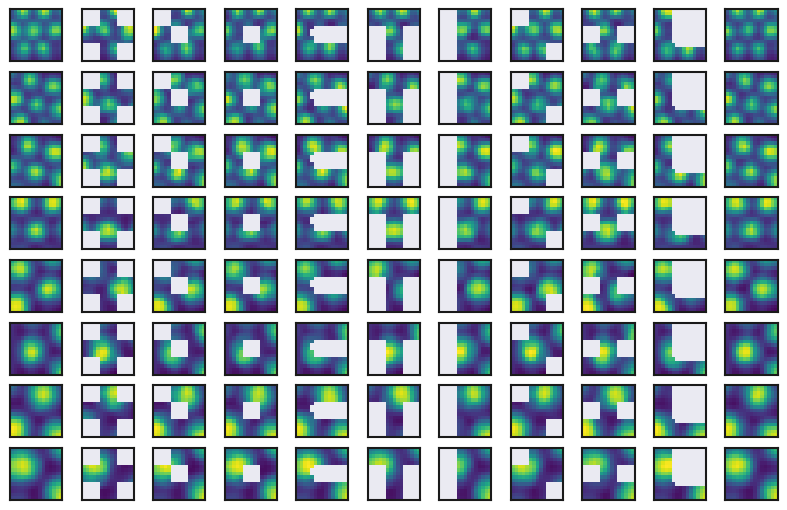

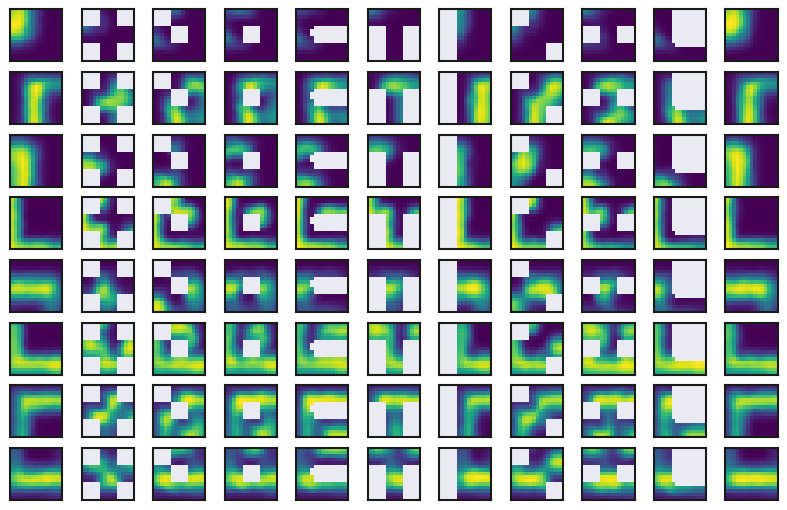

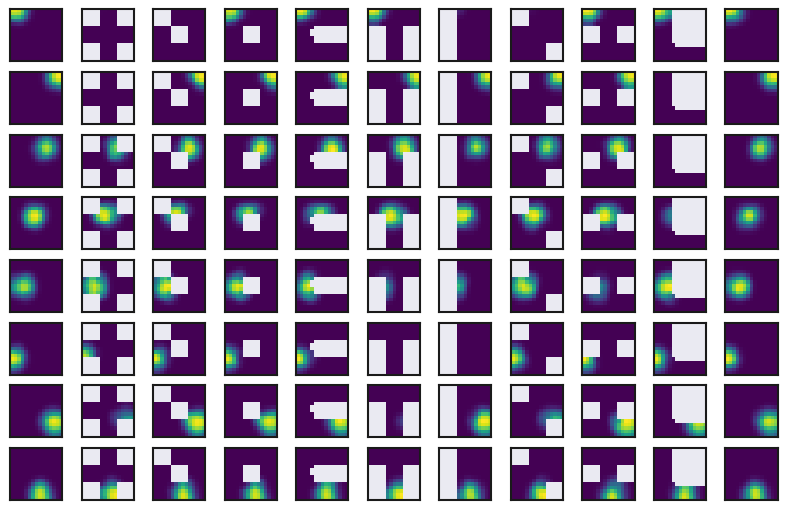

In [53]:
# plot example rate maps from each basis
bases = ["GC", "BVC", "PC"]
for basis in bases:
    basis_maps = joblib.load(os.path.join(p, "data", "riab_agent_bases", f"{animal}_{basis}_maps"))
    example_maps = deepcopy(basis_maps)
    example_cells_idx = np.arange(1,200,25)
    example_days_idx = np.arange(20, 31)
    example_maps["smoothed"] = example_maps["smoothed"][:, :, example_cells_idx, :][:, :, :, example_days_idx]
    _ = plot_maps(example_maps, animal,  p, False, example_cells_idx,
              unsmoothed=False, make_dir=False, cmap='viridis')

In [6]:
# build RSM from naive PC model
def get_model_rsm(animals, p, feature_type='PC'):
    p_models = os.path.join(p, "data", "riab_agent_bases")
    os.chdir(p_models)
    behav_dict = joblib.load(os.path.join(p, "data", "behav_dict"))
    for animal in animals:
        models_maps = joblib.load(os.path.join(p_models, f'{animal}_{feature_type}_maps'))
        rsm_model, rsm_labels_model, cell_idx_model = get_cell_rsm_partitioned(models_maps)
        rsm_dict_model = {'RSM': rsm_model, 'd_labels': rsm_labels_model[:, 0], 'p_labels': rsm_labels_model[:, 1],
                          'cell_idx': cell_idx_model, 'envs': behav_dict[animal]['envs']}
        joblib.dump(rsm_dict_model, f'{animal}_model_{feature_type}_rsm_partitioned_cellwise')
    return rsm_models_dict

In [ ]:
rsm_models_dict = get_model_rsm([animal], p, feature_type='PC')

Loaded model RSMs for all animals
Model rsm dictionary created and saved in /Users/jquinnlee/Desktop/georep_hipp/data/riab_agent_bases


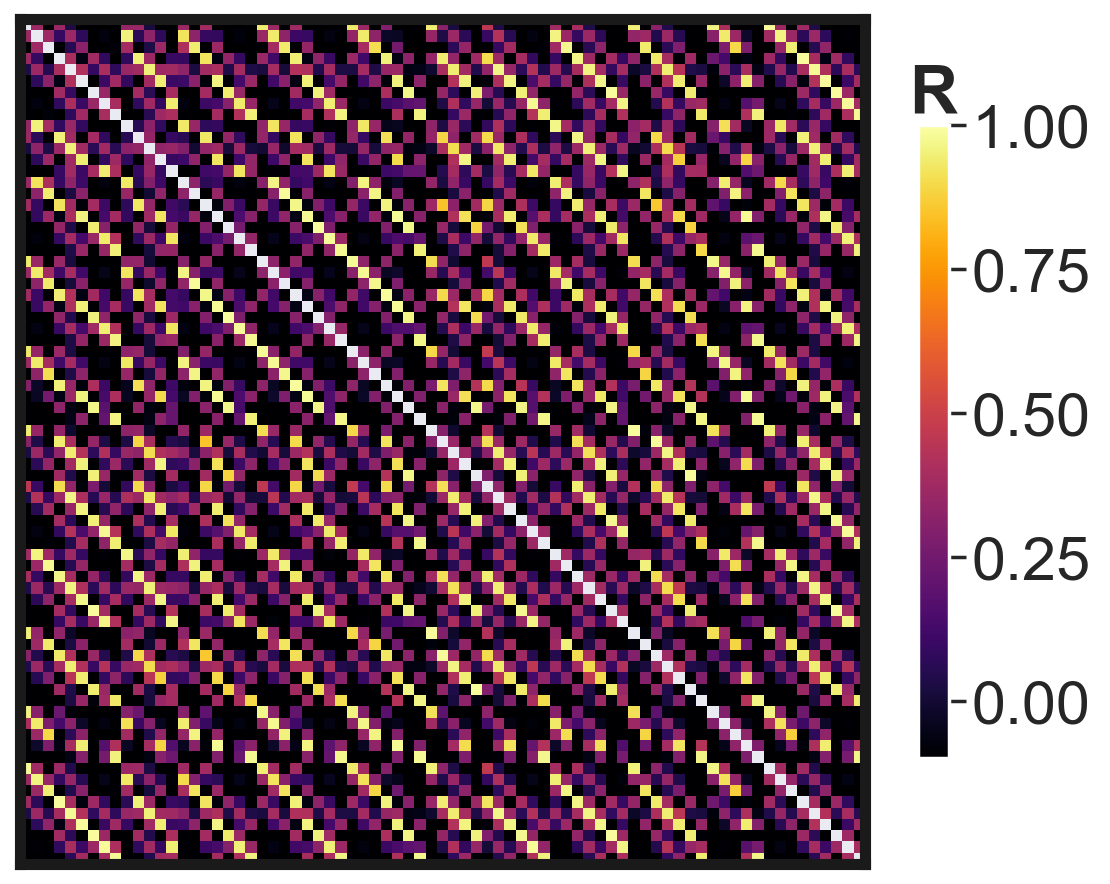

In [11]:
# Build dictionary for model RSM with average results, and plot resulting RSM
get_rsm_model_dict([animal], ["PC"], p_models=os.path.join(p, "data", "riab_agent_bases"))
rsm_models = joblib.load(os.path.join(p, "data", "riab_agent_bases", "rsm_models"))
_ = plot_rsm_parts_averaged(rsm_models["PC"]["averaged"], vmin=-.1, vmax=1., cmap="inferno")

## Construct PCs from Grid and BV basis set, using methods described in Solstad et al. (2006) and Barry et al. (2006), respectively

In [ ]:
# pc_rate_maps = get_solstad_pc_population(n_pcs=1000, threshold=True)
# joblib.dump(pc_rate_maps, os.path.join(p, "data", "riab_agent_bases", "solstad_gc2pc_receptive_fields_th"))

# example animal without boundary-tethering method
np.random.seed(2023)
pc_receptive_fields = joblib.load(os.path.join(p, "data", "riab_agent_bases", "solstad_gc2pc_receptive_fields_th"))
GC2PC_maps([animal], pc_receptive_fields, threshold=True, compute_rsm=True, p=p)

In [16]:
bvc2pc_maps(animal, nPCs=200, compute_rsm=True, s_path=os.path.join(p, "data", "riab_agent_bases"), p=os.path.join(p, "data"))

Computing PC rate maps from model BVC rate maps


Fitting model cell wise across days: 100%|██████████| 31/31 [00:00<00:00, 318.33it/s]
Correlating partitions of rate maps across days and cell pairs: 200it [29:39,  8.90s/it]

--- 1779.6852452754974 seconds ---


## Construct a boundary-tethered version of grid cells, as in Keinath et al. (2018)

In [39]:
bt_GC2PC_maps([animal], p=p, n_pc=200, threshold=True, compute_rsm=False)

Creating boundary fields for all geometries: 100%|██████████| 10/10 [00:08<00:00,  1.19it/s]
Creating shifted receptive fields for each boundary condition and environment: 100%|██████████| 10/10 [00:00<00:00, 4692.67it/s]
Creating boundary-tethered rate maps: 100%|██████████| 31/31 [00:13<00:00,  2.31it/s]
Correlating partitions of rate maps across days and cell pairs: 31it [04:36,  8.92s/it]


KeyboardInterrupt: 

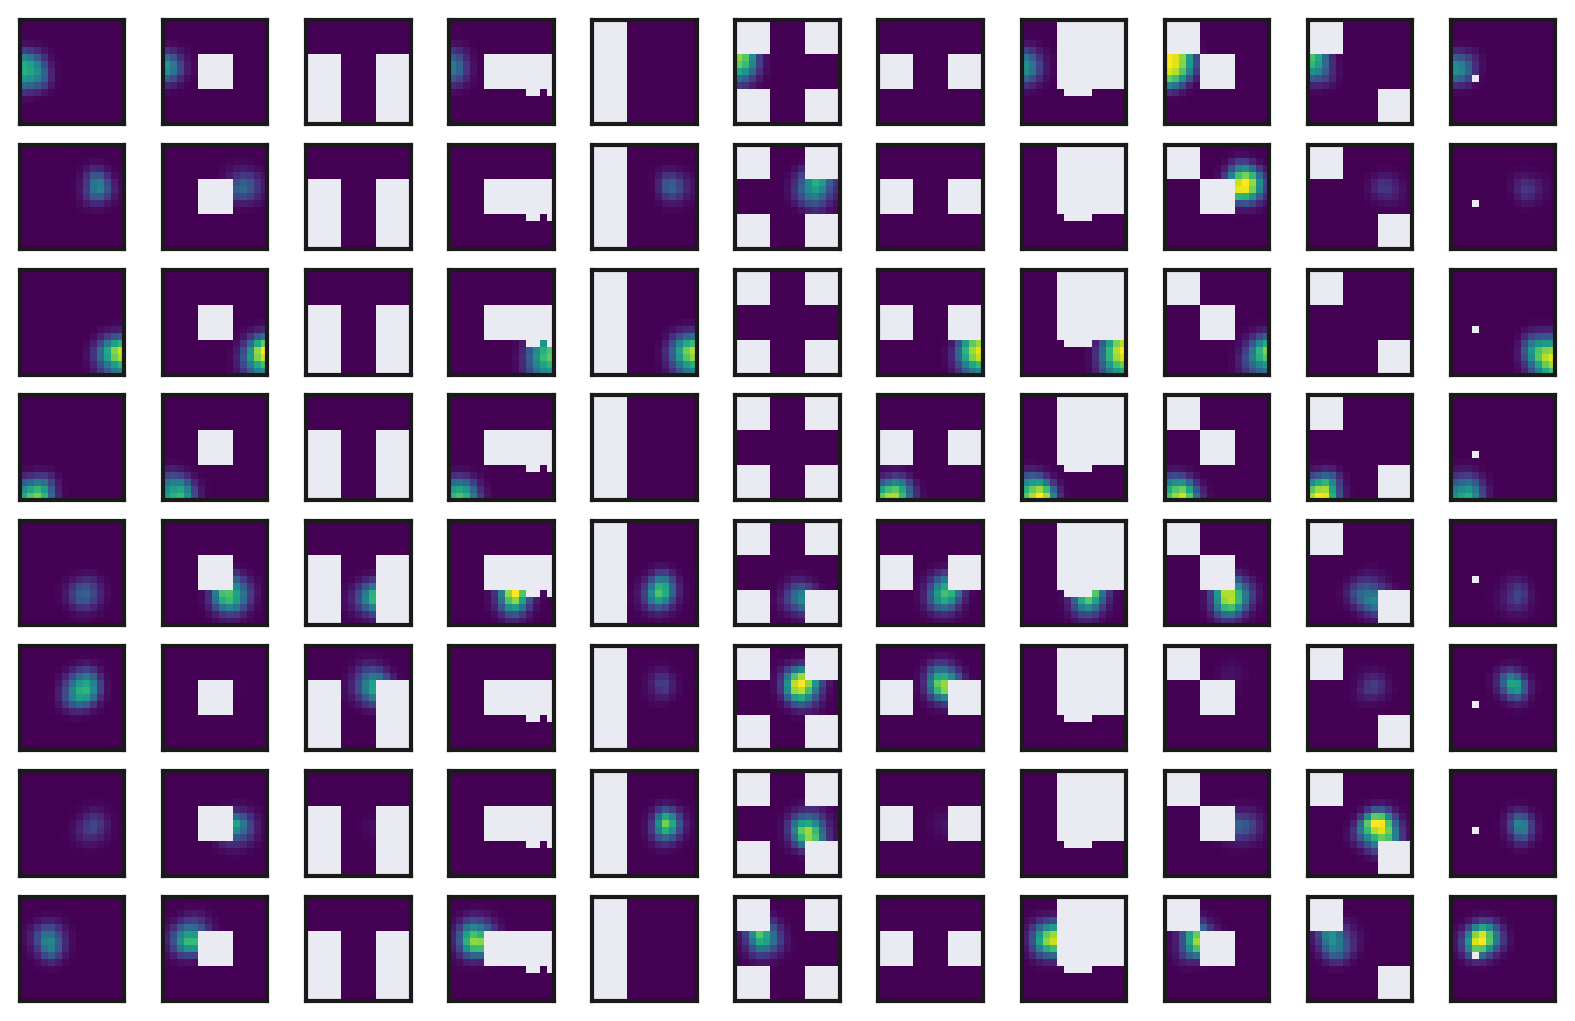

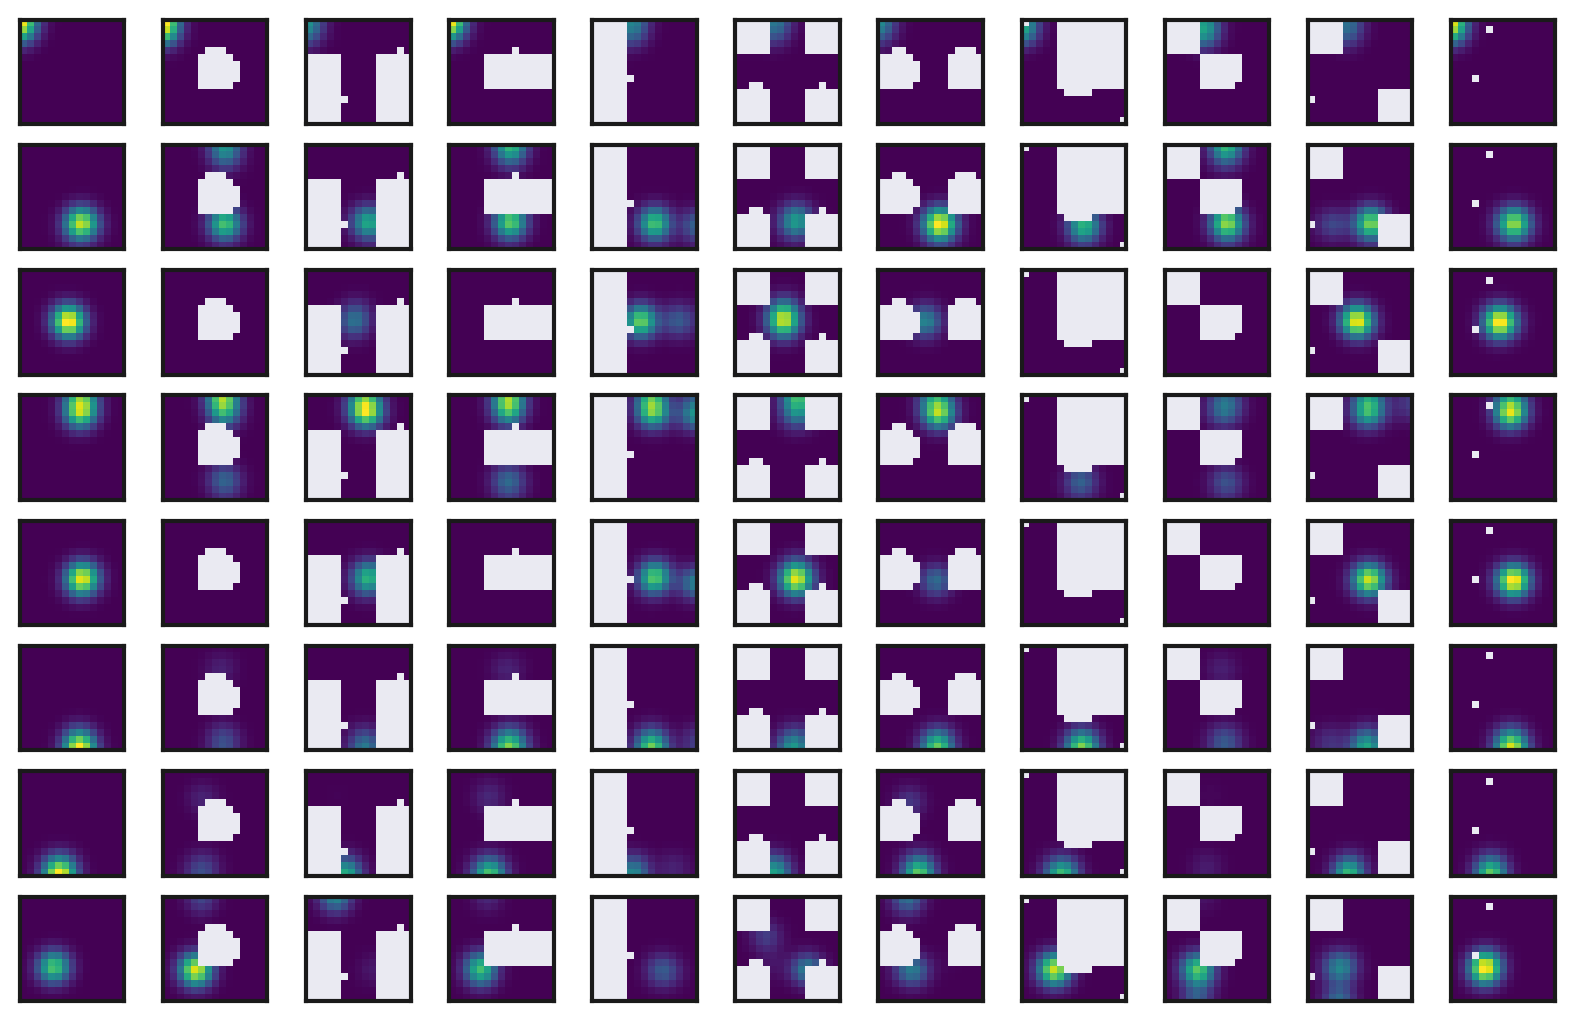

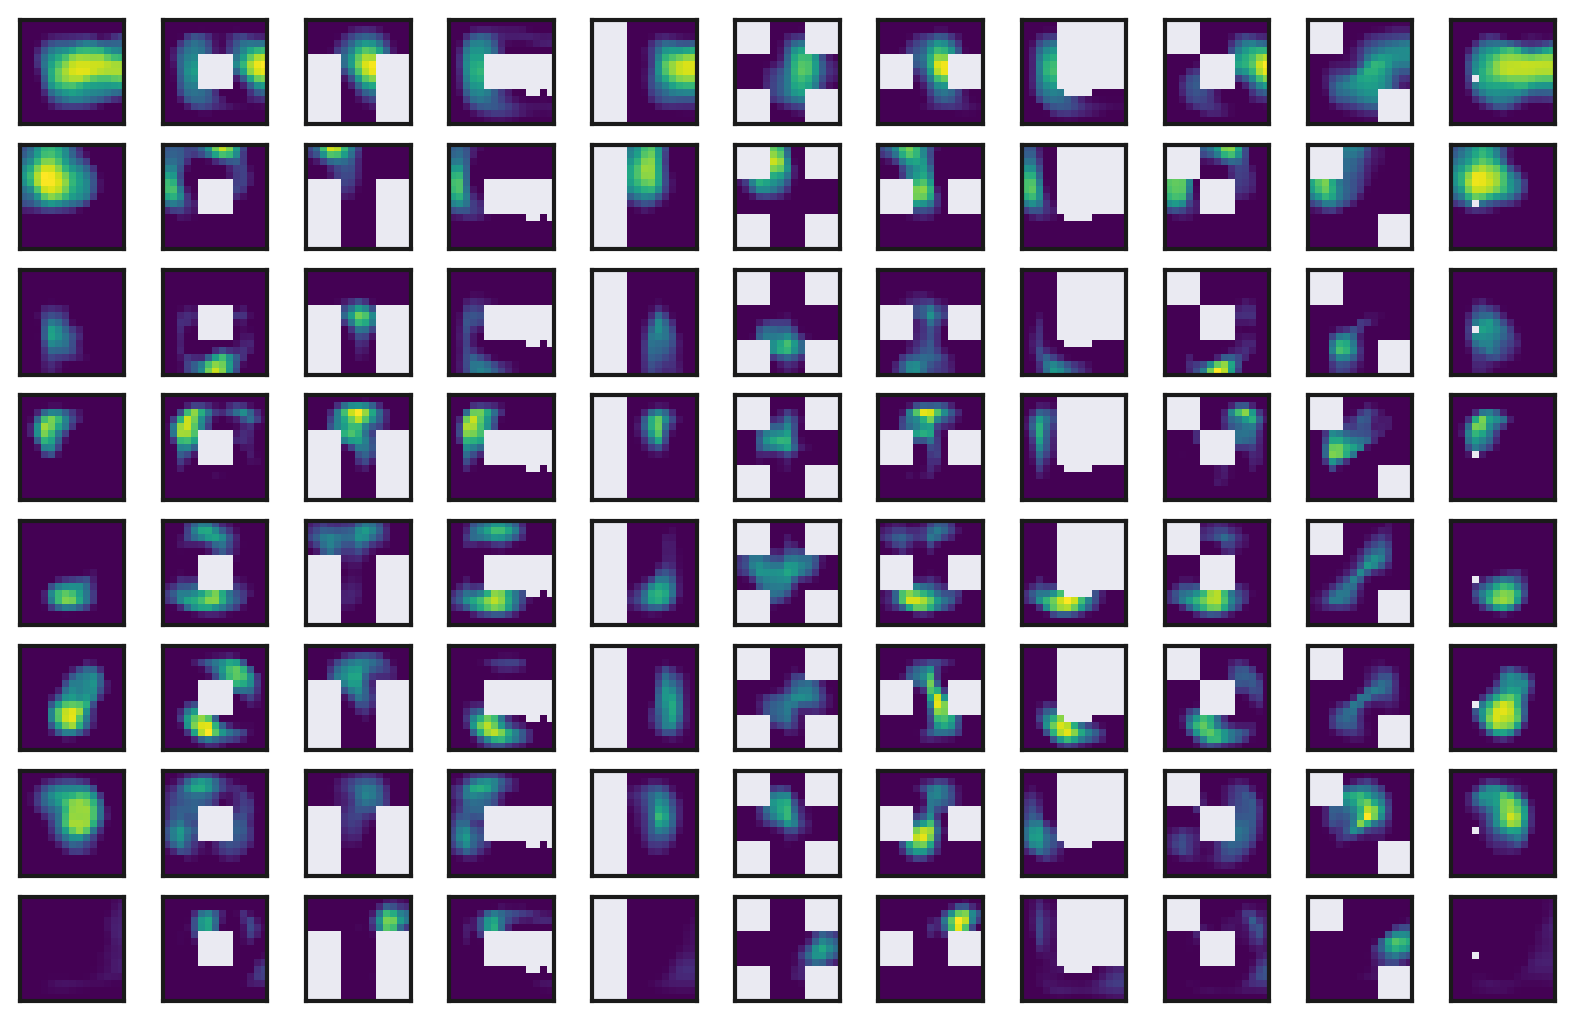

In [40]:
model_PCs = ["GC2PC_th", "bt_GC2PC_th", "BVC2PC"]
for model in model_PCs:
    model_maps = joblib.load(os.path.join(p, "data", "riab_agent_bases", f"{animal}_{model}_maps"))
    example_maps = deepcopy(model_maps)
    example_cells_idx = np.arange(1,200,25)
    example_days_idx = np.arange(20, 31)
    example_maps["smoothed"] = example_maps["smoothed"][:, :, example_cells_idx, :][:, :, :, example_days_idx]
    _ = plot_maps(example_maps, animal,  p, False, example_cells_idx,
              unsmoothed=False, make_dir=False, cmap='viridis')

Loaded model RSMs for all animals
Loaded model RSMs for all animals
Loaded model RSMs for all animals
Model rsm dictionary created and saved in /Users/jquinnlee/Desktop/georep_hipp/data/riab_agent_bases


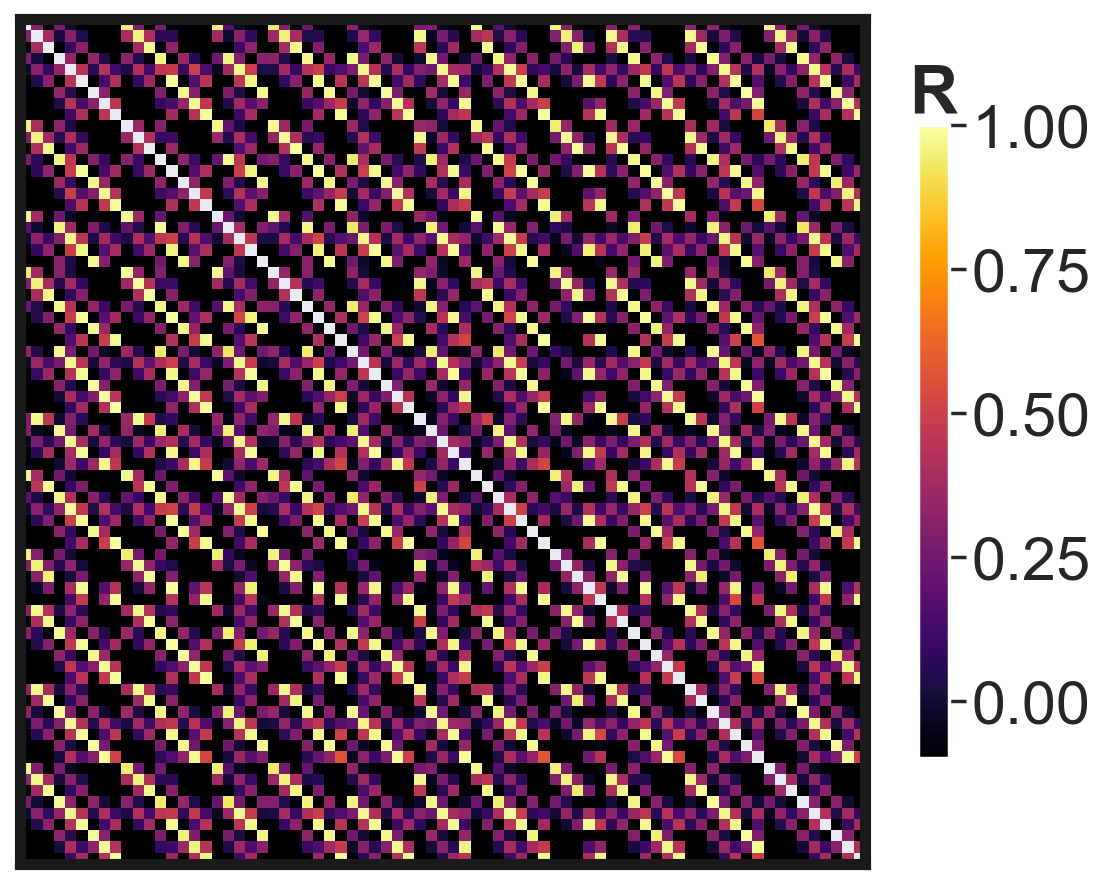

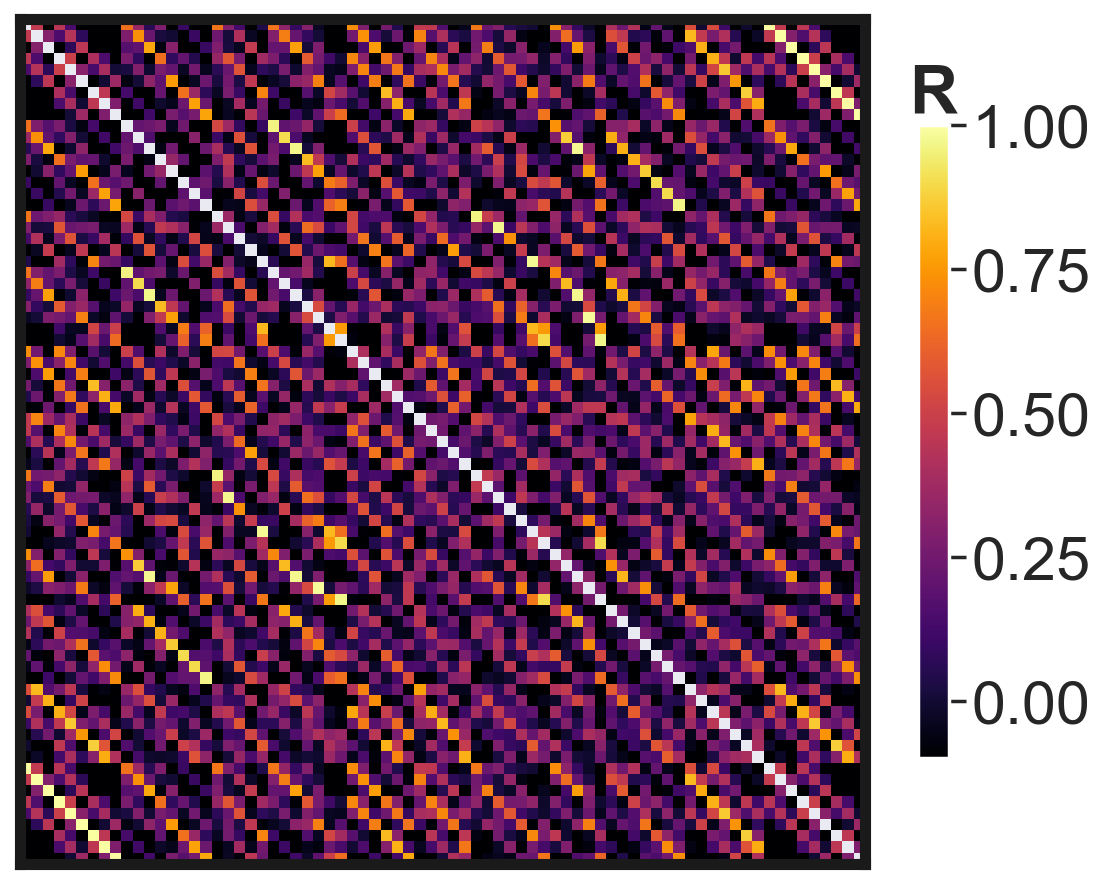

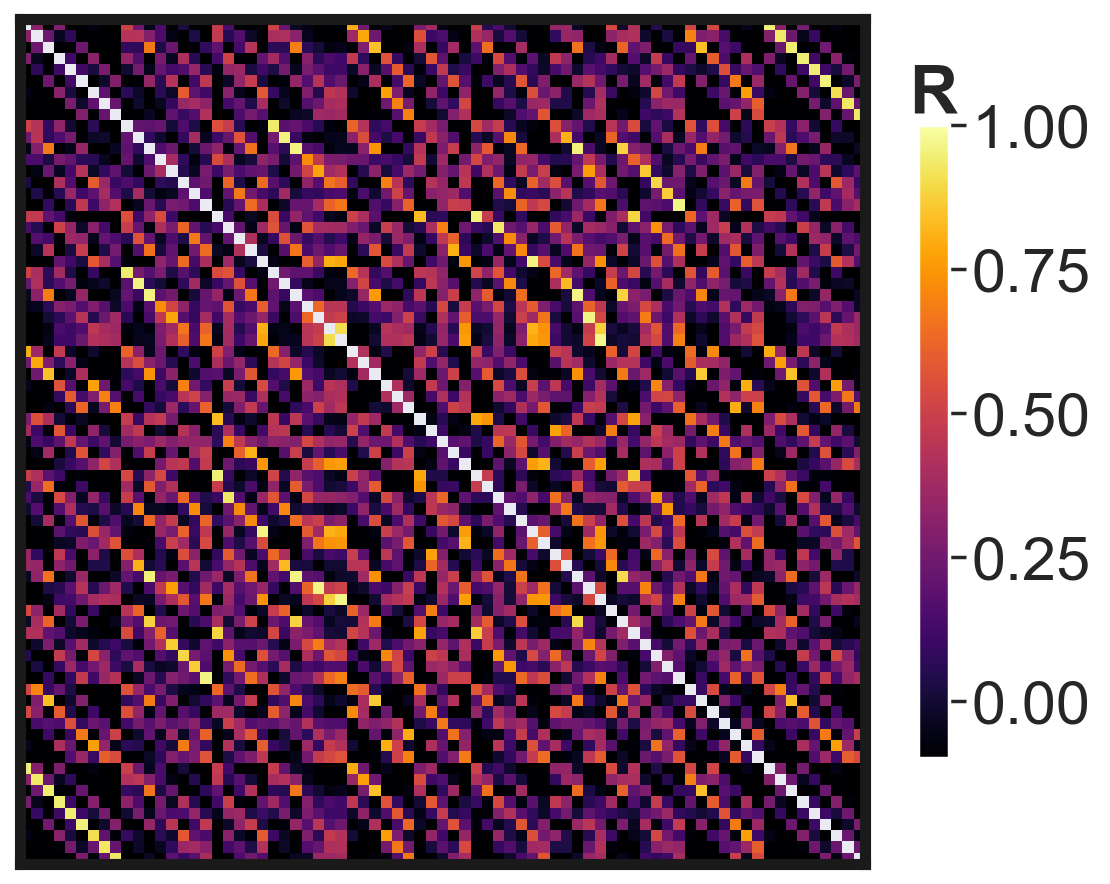

In [41]:
# Build dictionary for model RSM with average results, and plot resulting RSM
get_rsm_model_dict([animal], model_PCs, p_models=os.path.join(p, "data", "riab_agent_bases"))
rsm_models = joblib.load(os.path.join(p, "data", "riab_agent_bases", "rsm_models"))
for model in model_PCs:
    _ = plot_rsm_parts_averaged(rsm_models[model]["averaged"], vmin=-.1, vmax=1., cmap="inferno")

## Next, model place cells as sucessor features, built either from PC basis (George et al., 2024), or BVC basis (de Cothi et al., 2019)

In [20]:
bases = ["PC", "BVC"]
sr_gamma=0.999
sr_alpha=(50./30.)*10**(-3)
for basis in bases:
    simulate_basis2sf([animal], basis, sr_gamma, sr_alpha)

QLAK-CA1-08 set loaded
Successor representation initialized


Pre-training SF from BVC inputs on first square day: 100%|██████████| 3/3 [00:38<00:00, 12.79s/it]
Computing successor features from BVC inputs across all sessions: 100%|██████████| 31/31 [09:45<00:00, 18.89s/it]


--- 627.6124398708344 seconds ---


In [23]:
# build rate maps and RSMs from model sucessor features
for basis in bases:
    feature_type = f"{basis}2SF_{sr_gamma:.5f}gamma_{sr_alpha:.5f}alpha"
    get_model_maps([animal], os.path.join(p, "data"), feature_types=[feature_type], compute_rsm=True)

100%|██████████| 31/31 [00:05<00:00,  5.57it/s]


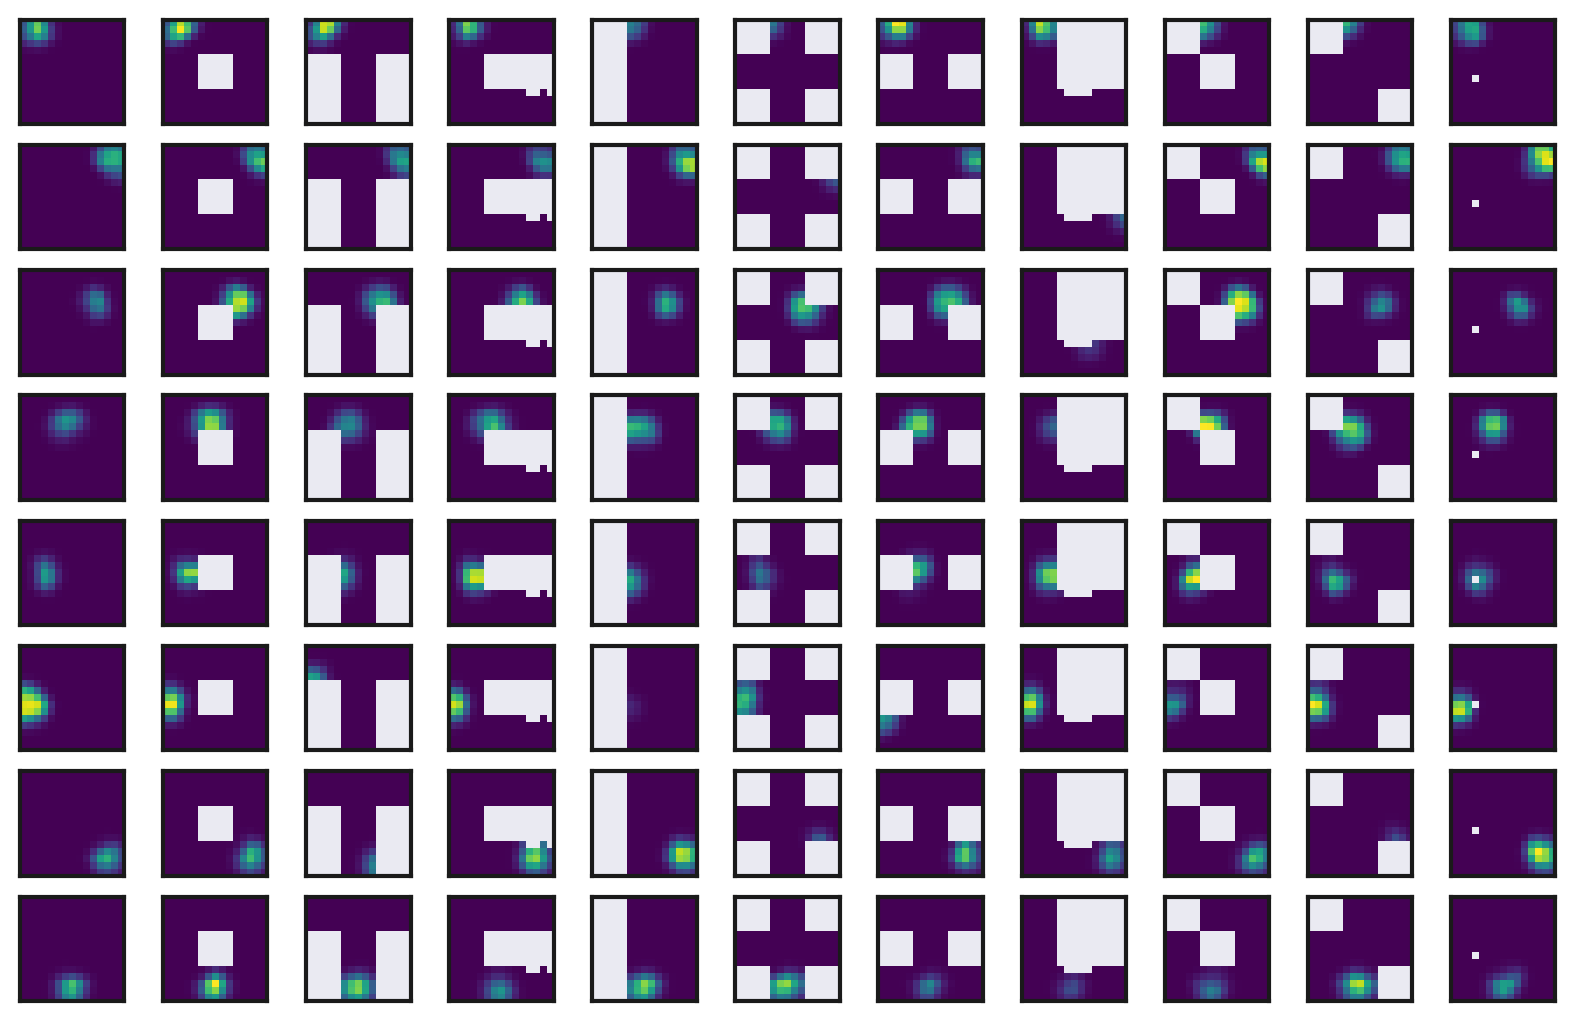

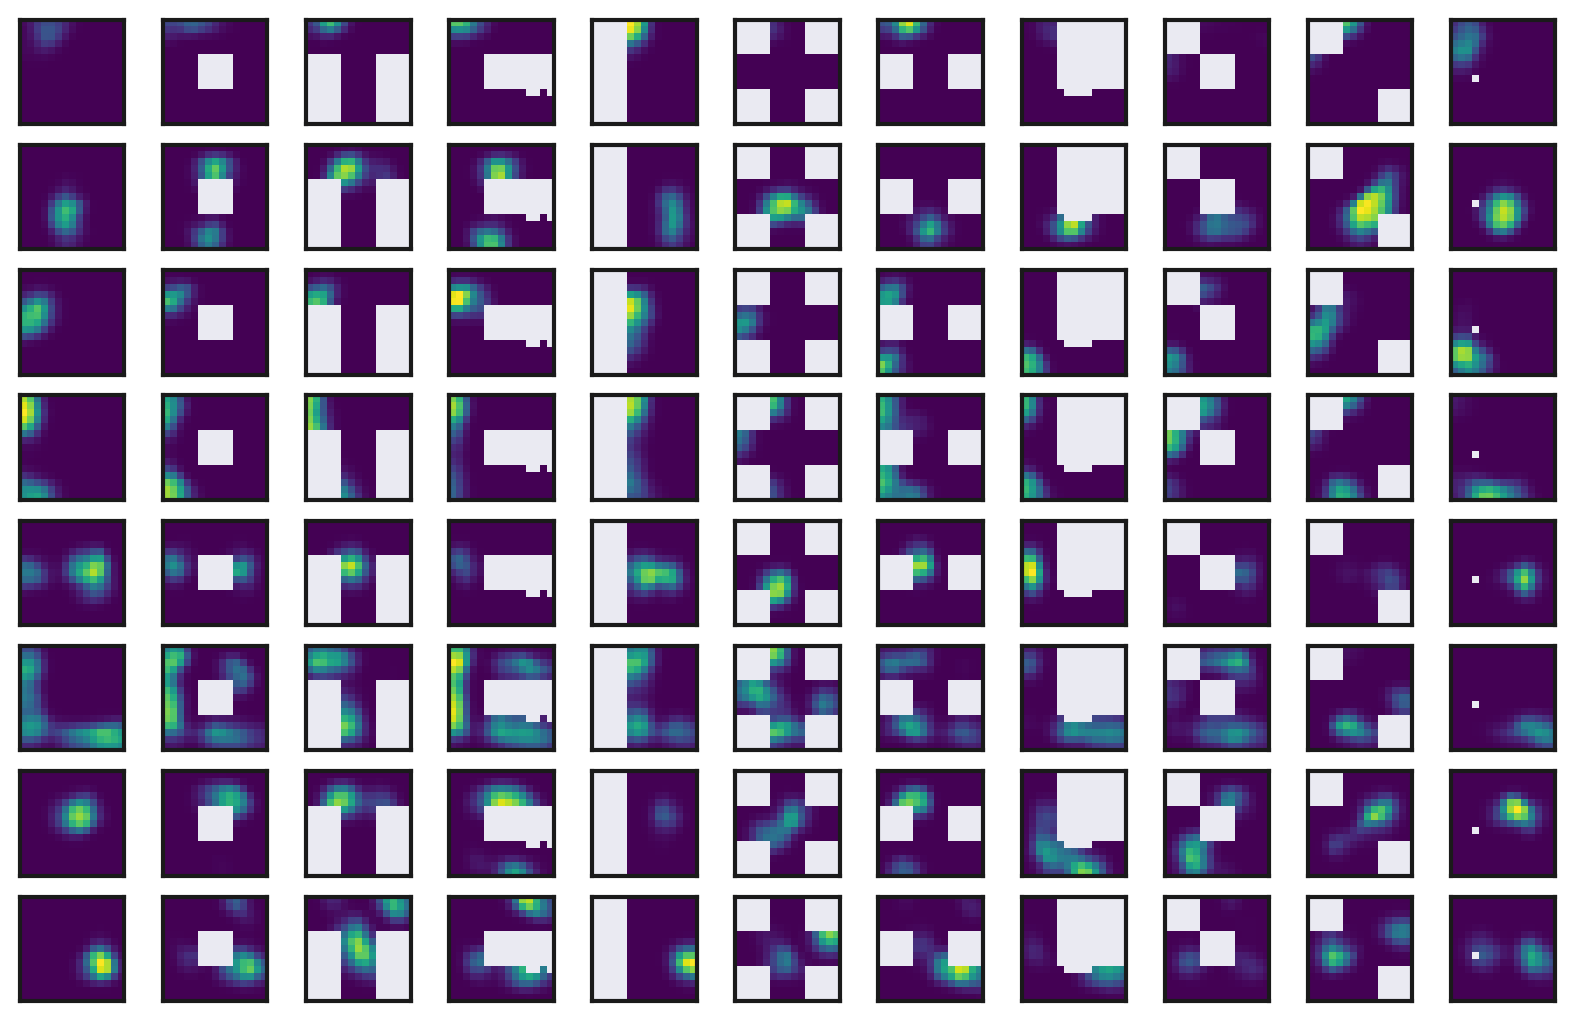

In [25]:
for basis in bases:
    feature_type = f"{basis}2SF_{sr_gamma:.5f}gamma_{sr_alpha:.5f}alpha"
    model_maps = joblib.load(os.path.join(p, "data", "riab_agent_bases", f"{animal}_{feature_type}_maps"))
    example_maps = deepcopy(model_maps)
    example_cells_idx = np.arange(1,200,25)
    example_days_idx = np.arange(20, 31)
    example_maps["smoothed"] = example_maps["smoothed"][:, :, example_cells_idx, :][:, :, :, example_days_idx]
    _ = plot_maps(example_maps, animal,  p, False, example_cells_idx,
              unsmoothed=False, make_dir=False, cmap='viridis')

## Plot resulting RSMs

Loaded model RSMs for all animals
Loaded model RSMs for all animals
Model rsm dictionary created and saved in /Users/jquinnlee/Desktop/georep_hipp/data/riab_agent_bases


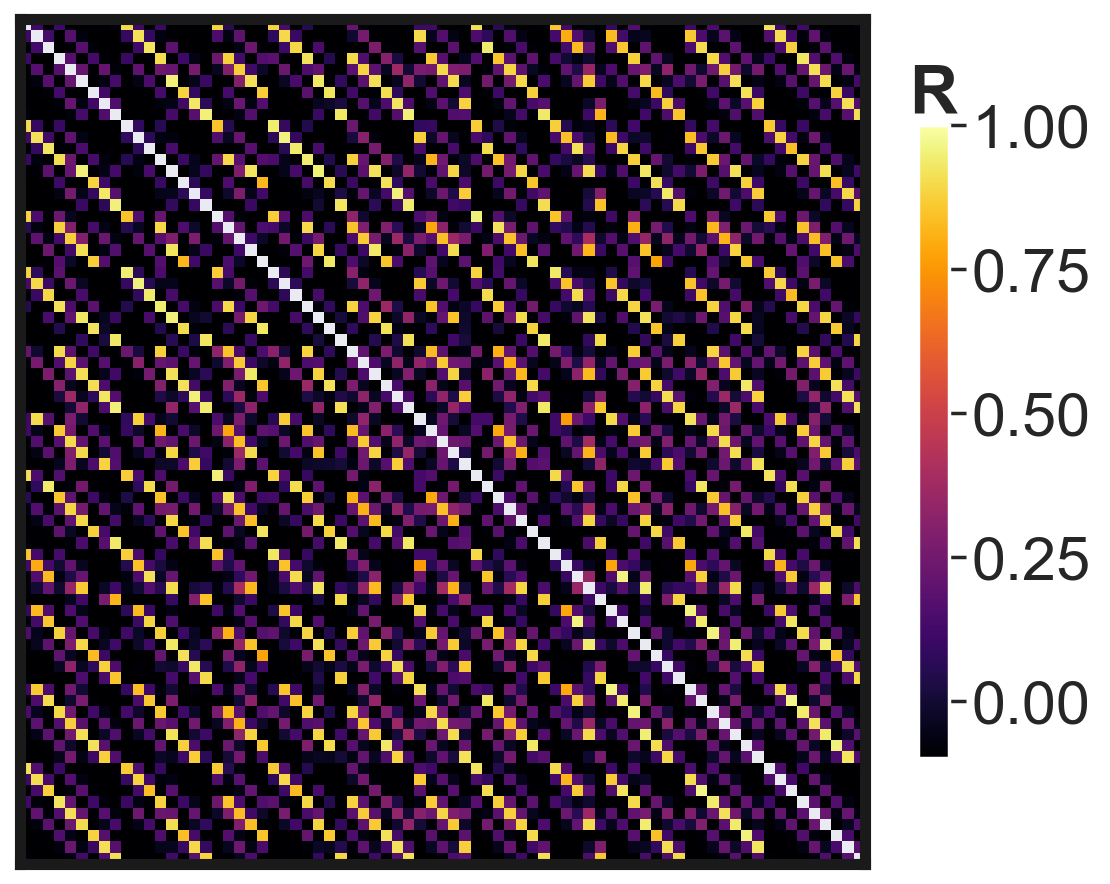

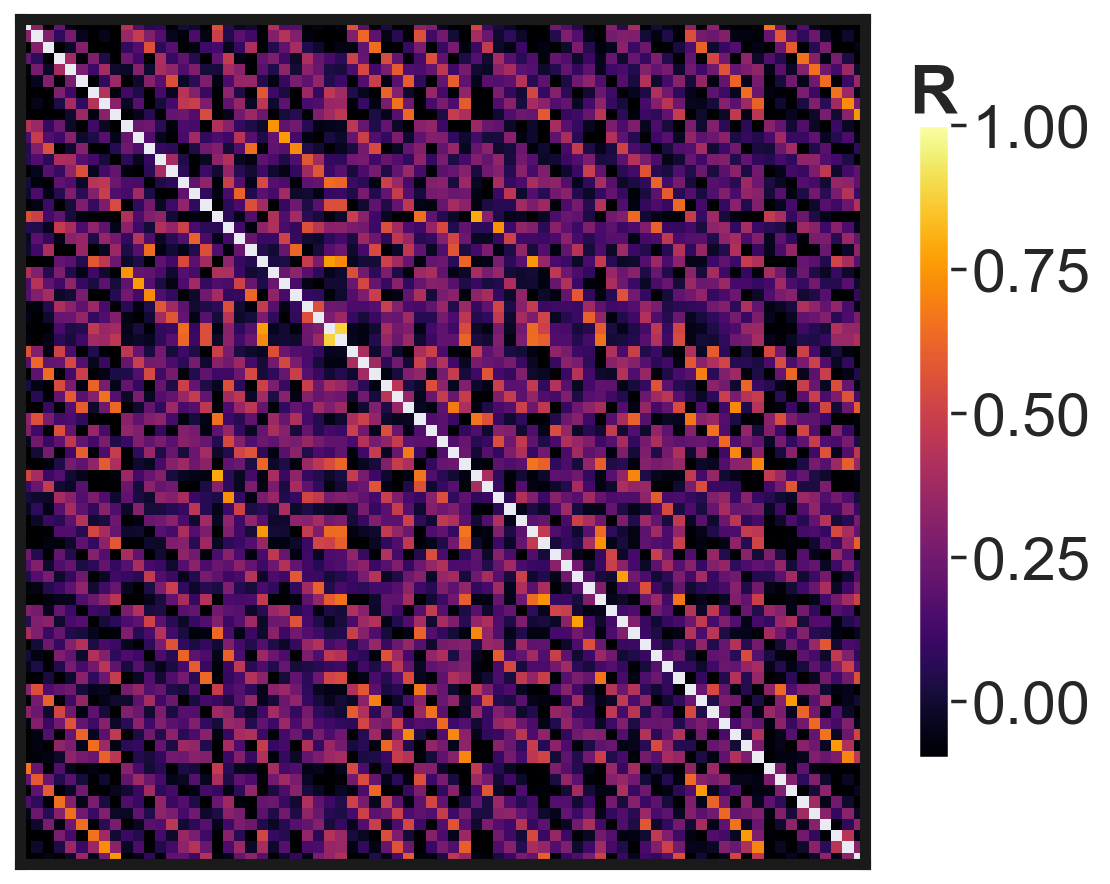

In [28]:
# Build dictionary for model RSM with average results, and plot resulting RSM
feature_types = [f"{basis}2SF_{sr_gamma:.5f}gamma_{sr_alpha:.5f}alpha" for basis in bases]
get_rsm_model_dict([animal], feature_types, p_models=os.path.join(p, "data", "riab_agent_bases"))
rsm_models = joblib.load(os.path.join(p, "data", "riab_agent_bases", "rsm_models"))
for feature_type in feature_types:
    _ = plot_rsm_parts_averaged(rsm_models[feature_type]["averaged"], vmin=-.1, vmax=1., cmap="inferno")

Loaded model RSMs for all animals
Loaded model RSMs for all animals
Loaded model RSMs for all animals
Loaded model RSMs for all animals
Loaded model RSMs for all animals
Loaded model RSMs for all animals
Model rsm dictionary created and saved in /Users/jquinnlee/Desktop/georep_hipp/data/riab_agent_bases


Fitting models to aggregate data with bootstrap procedure: 6it [00:02,  2.10it/s]
Fitting models to aggregate data with bootstrap procedure: 6it [00:00, 19.56it/s]


One-way ANOVA for effect of model on predicting CA1 representation: 
             df    sum_sq   mean_sq             F  PR(>F)
C(Model)    5.0  6.369018  1.273804  15649.039009     0.0
Residual  594.0  0.048351  0.000081           NaN     NaN


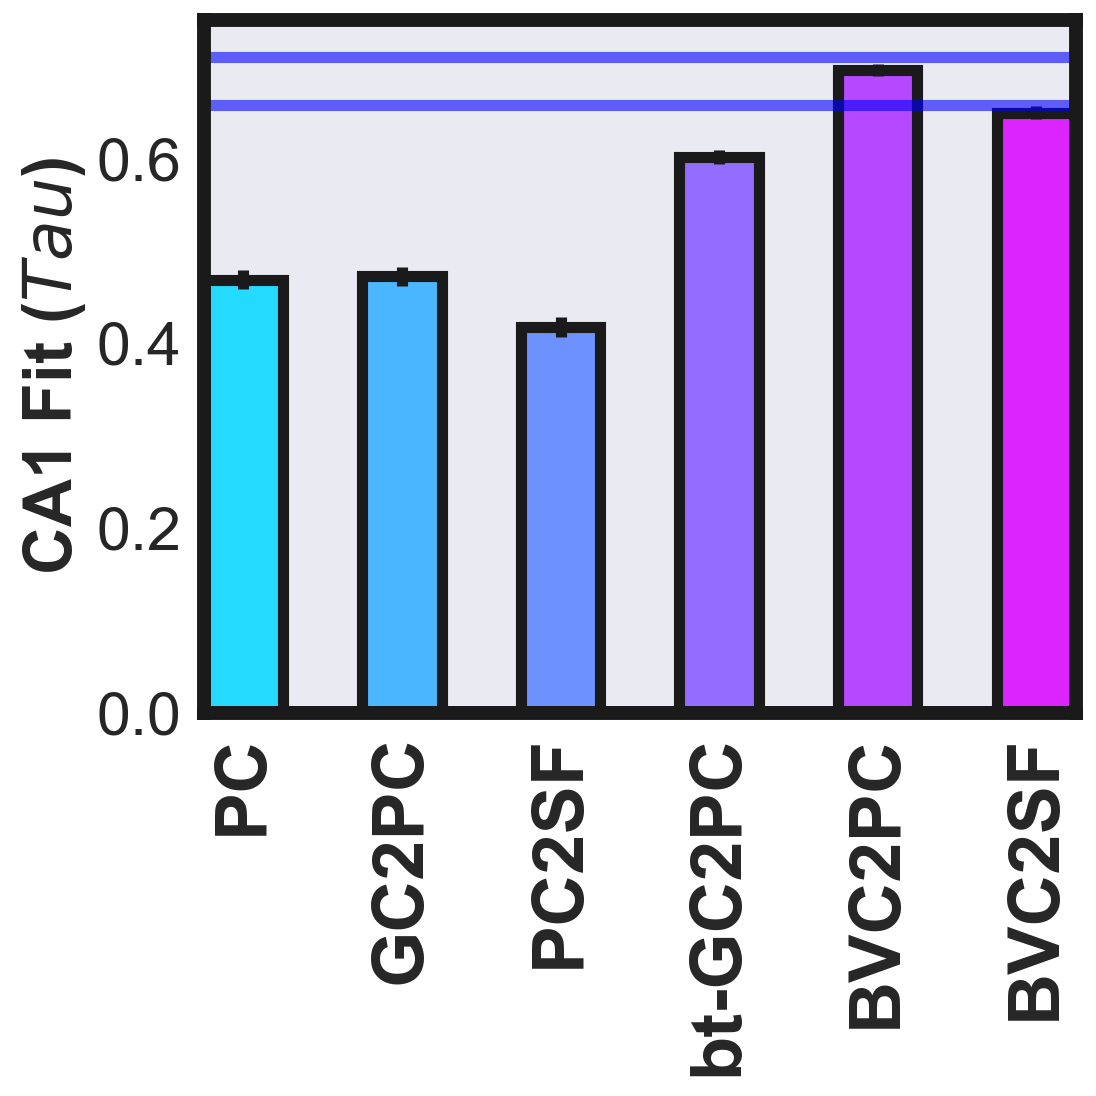

In [45]:
feature_types = ["PC", "GC2PC_th", f"PC2SF_{sr_gamma:.5f}gamma_{sr_alpha:.5f}alpha", "bt_GC2PC_th", "BVC2PC", f"BVC2SF_{sr_gamma:.5f}gamma_{sr_alpha:.5f}alpha"]
feature_names = ["PC", "GC2PC", "PC2SF", "bt-GC2PC", "BVC2PC", "BVC2SF"]

# p = r"I:\weirdGeos\AggPreloads"
get_rsm_model_dict(animals, feature_types, p_models=os.path.join(p, "data", "riab_agent_bases"))
rsm_models = joblib.load(os.path.join(p, "data", "riab_agent_bases", "rsm_models"))
# load the same rsm computed from actual data
rsm_parts_ordered = joblib.load(os.path.join(p, "results", "rsm_parts_ordered"))
rsm_parts_averaged = joblib.load(os.path.join(p, "results", "rsm_parts_averaged"))
# noise marin indicates the noise floor and ceiling (columns) for each animal (rows), rsm mask is to remove tri and nans
noise_margin_agg, rsm_mask_agg = get_noise_margin(rsm_parts_ordered)
n_parts = 9
cols = ["Model", "Fit", "SE", "P value"]
df_agg_bootstrap = pd.DataFrame(data=np.zeros([len(feature_types), len(cols)]) * np.nan, columns=cols)
for f, feature_type in tqdm(enumerate(feature_types), desc='Fitting models to aggregate data with bootstrap procedure',
                            position=0, leave=True):
    fit, se, p_val = get_rsm_fit_bootstrap(rsm_parts_averaged,
                                           rsm_models[feature_type]['averaged'],
                                           method='Tau')
    # df_agg_bootstrap.iloc[f]=np.hstack((feature_type, fit, se, p_val, rsm_models[feature_type]["constant"],
    #                                     rsm_models[feature_type]["scalar"]))
    df_agg_bootstrap.iloc[f] = np.hstack((feature_type, fit, se, p_val))
df_agg_bootstrap.iloc[:, 1:] = df_agg_bootstrap.iloc[:, 1:].astype(float)

# verbose bootstrap for one-way anova of model effects
cols = ["Model", "Fits"]
n_bootstrap = 100
df_agg_bootstrap_ANOVA = pd.DataFrame(data=np.zeros([len(feature_types) * n_bootstrap, len(cols)]), columns=cols)
c = 0
for f, feature_type in tqdm(enumerate(feature_types), desc='Fitting models to aggregate data with bootstrap procedure',
                            position=0, leave=True):
    fits = get_rsm_fit_bootstrap_verbose(rsm_parts_averaged, rsm_models[feature_type]['averaged'], n_bootstrap,
                                         method='Tau')

    df_agg_bootstrap_ANOVA.iloc[c:c+n_bootstrap, :] = np.vstack((np.tile(f, n_bootstrap), fits)).T
    c += n_bootstrap
df_agg_bootstrap_ANOVA.iloc[:, 1] = df_agg_bootstrap_ANOVA.iloc[:, 1].astype(float)
formula = 'Fits ~ C(Model)'
lm = ols(formula, df_agg_bootstrap_ANOVA).fit()
print(f"One-way ANOVA for effect of model on predicting CA1 representation: \n{anova_lm(lm)}")

sns.set(style='dark', font_scale=2.)
fig = plt.figure(figsize=(6, 6))
ax = plt.subplot()
bp = sns.barplot(data=df_agg_bootstrap, x=df_agg_bootstrap["Model"], y=df_agg_bootstrap["Fit"], width=.5,
                 saturation=1., palette='cool', edgecolor='k', linewidth=4, errcolor='k', errwidth=0.)
for pt, patch in enumerate(bp.patches):
    plt.errorbar(x=patch.get_x() + .25, y=patch.get_height(), yerr=df_agg_bootstrap['SE'].iloc[pt], c='k',
                 linewidth=4.)
ax.axhline(np.mean(noise_margin_agg[:, 0], axis=0), c='blue', linewidth=4.0, alpha=.6)
ax.axhline(np.mean(noise_margin_agg[:, 1], axis=0), c='blue', linewidth=4.0, alpha=.6)
ax.set_ylim([.0, .75])
ax.set_ylabel("CA1 Fit ($Tau$)", weight='bold')
ax.axhline(0.0, c='k', linewidth=5.)
ax.set_xticks(np.arange(len(feature_names)))
ax.set_xticklabels(feature_names, weight='bold', fontsize=26, rotation=90)
ax.set_xlabel("")
plt.setp(ax.spines.values(), color='k', linewidth=5)
plt.tight_layout()
plt.show()

## How does model fit vary across sequences?

Fitting models to aggregate data with bootstrap procedure: 6it [00:08,  1.42s/it]
Fitting models to aggregate data with bootstrap procedure: 6it [00:00,  6.25it/s]


Two-way ANOVA for effect of model on predicting CA1 representation across sequences: 
                          df     sum_sq   mean_sq             F  PR(>F)
C(Model)                 5.0  15.285757  3.057151  35881.090972     0.0
C(Sequence)              2.0   1.148220  0.574110   6738.197303     0.0
C(Model):C(Sequence)    10.0   0.504697  0.050470    592.351558     0.0
Residual              1782.0   0.151830  0.000085           NaN     NaN


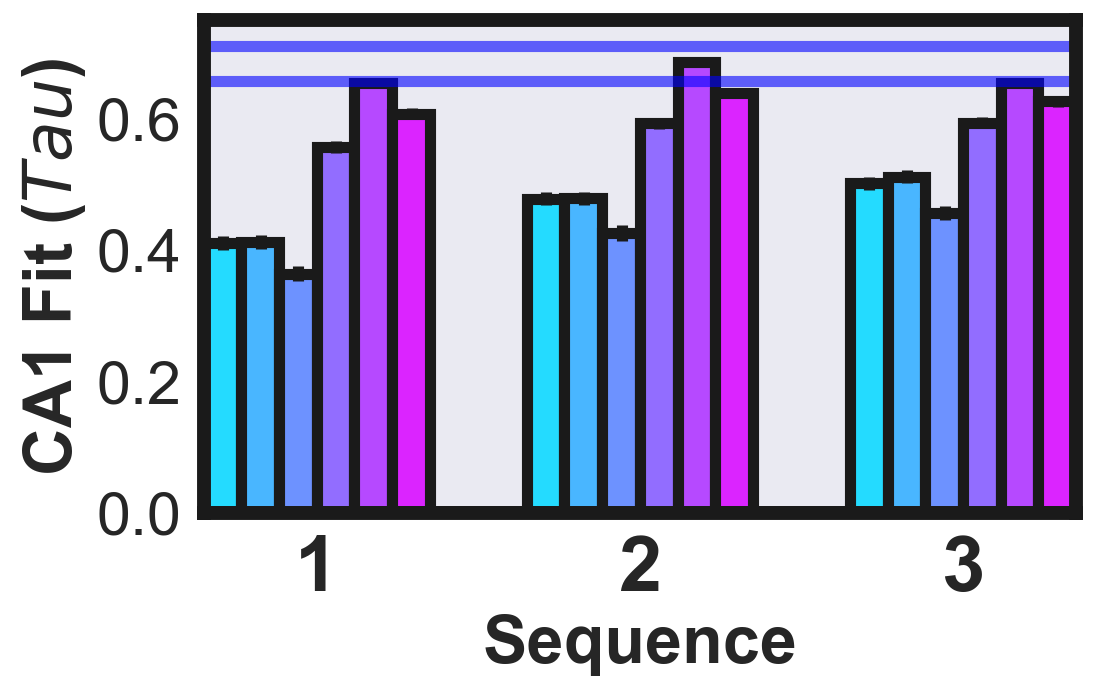

In [47]:

## How do the models fit for each sequence?
rsm_parts_sequences = np.nanmean(rsm_parts_ordered, axis=1)
n_seq = rsm_parts_sequences.shape[0]

cols = ["Model", "Fit", "Sequence", "SE"]
df_agg_bootstrap = pd.DataFrame(data=np.zeros([len(feature_types) * n_seq, len(cols)]) * np.nan, columns=cols)
count = 0
for f, feature_type in tqdm(enumerate(feature_types), desc='Fitting models to aggregate data with bootstrap procedure',
                            position=0, leave=True):
    for s in range(n_seq):

        fit, se, p_val = get_rsm_fit_bootstrap(rsm_parts_sequences[s],
                                               rsm_models[feature_type]['averaged'],
                                               method='Tau')
        df_agg_bootstrap.iloc[count] = np.hstack((feature_names[f], fit, s, se))
        count += 1
df_agg_bootstrap.iloc[:, 1:] = df_agg_bootstrap.iloc[:, 1:].astype(float)

# verbose bootstrap for one-way anova of model effects
cols = ["Model", "Sequence", "Fits"]
n_bootstrap = 100
df_agg_bootstrap_ANOVA = pd.DataFrame(data=np.zeros([len(feature_types) * n_bootstrap * n_seq, len(cols)]),
                                      columns=cols)
c = 0
for f, feature_type in tqdm(enumerate(feature_types), desc='Fitting models to aggregate data with bootstrap procedure',
                            position=0, leave=True):
    for s in range(n_seq):
        fits = get_rsm_fit_bootstrap_verbose(rsm_parts_sequences[s], rsm_models[feature_type]['averaged'], n_bootstrap,
                                             method='Tau')

        df_agg_bootstrap_ANOVA.iloc[c:c+n_bootstrap, :] = np.vstack((np.tile(f, n_bootstrap), np.tile(s, n_bootstrap),
                                                                     fits)).T
        c += n_bootstrap
df_agg_bootstrap_ANOVA.iloc[:, 1:] = df_agg_bootstrap_ANOVA.iloc[:, 1:].astype(float)
formula = 'Fits ~ C(Model) + C(Sequence) + C(Model):C(Sequence)'
lm = ols(formula, df_agg_bootstrap_ANOVA).fit()
print(f"Two-way ANOVA for effect of model on predicting CA1 representation across sequences: \n{anova_lm(lm)}")


sns.set(style='dark', font_scale=2.)
fig = plt.figure(figsize=(6, 4))
ax = plt.subplot()
bp = sns.barplot(data=df_agg_bootstrap, hue=df_agg_bootstrap["Model"], y=df_agg_bootstrap["Fit"],
                 x=df_agg_bootstrap["Sequence"], width=.7, saturation=1.,
                 palette='cool', edgecolor='k', linewidth=4, errcolor='k',
                 legend=False)
for pt, patch in enumerate(bp.patches):
    if pt < df_agg_bootstrap.shape[0]:
        plt.errorbar(x=patch.get_x() + .06, y=patch.get_height(), yerr=df_agg_bootstrap['SE'].iloc[pt], c='k',
                     linewidth=4.)
ax.axhline(np.mean(noise_margin_agg[:, 0], axis=0), c='blue', linewidth=4.0, alpha=.6)
ax.axhline(np.mean(noise_margin_agg[:, 1], axis=0), c='blue', linewidth=4.0, alpha=.6)
ax.set_ylim([0.0, .75])
ax.set_ylabel("CA1 Fit ($Tau$)", weight='bold')
ax.axhline(0.0, c='k', linewidth=5.)
ax.set_xticks(np.arange(n_seq))
ax.set_xticklabels(np.arange(n_seq) + 1, weight='bold', fontsize=28, rotation=0)
ax.set_xlabel("Sequence", weight="bold")
plt.setp(ax.spines.values(), color='k', linewidth=5)
# plt.legend(bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()
fig.savefig(os.path.join(p, "Figures", "rsm_model_comparison_sequences.svg"))
fig.savefig(os.path.join(p, "Figures", "rsm_model_comparison_sequences.png"), dpi=300)

QLAK-CA1-08
QLAK-CA1-30
QLAK-CA1-50
QLAK-CA1-51
QLAK-CA1-56
QLAK-CA1-74
QLAK-CA1-75


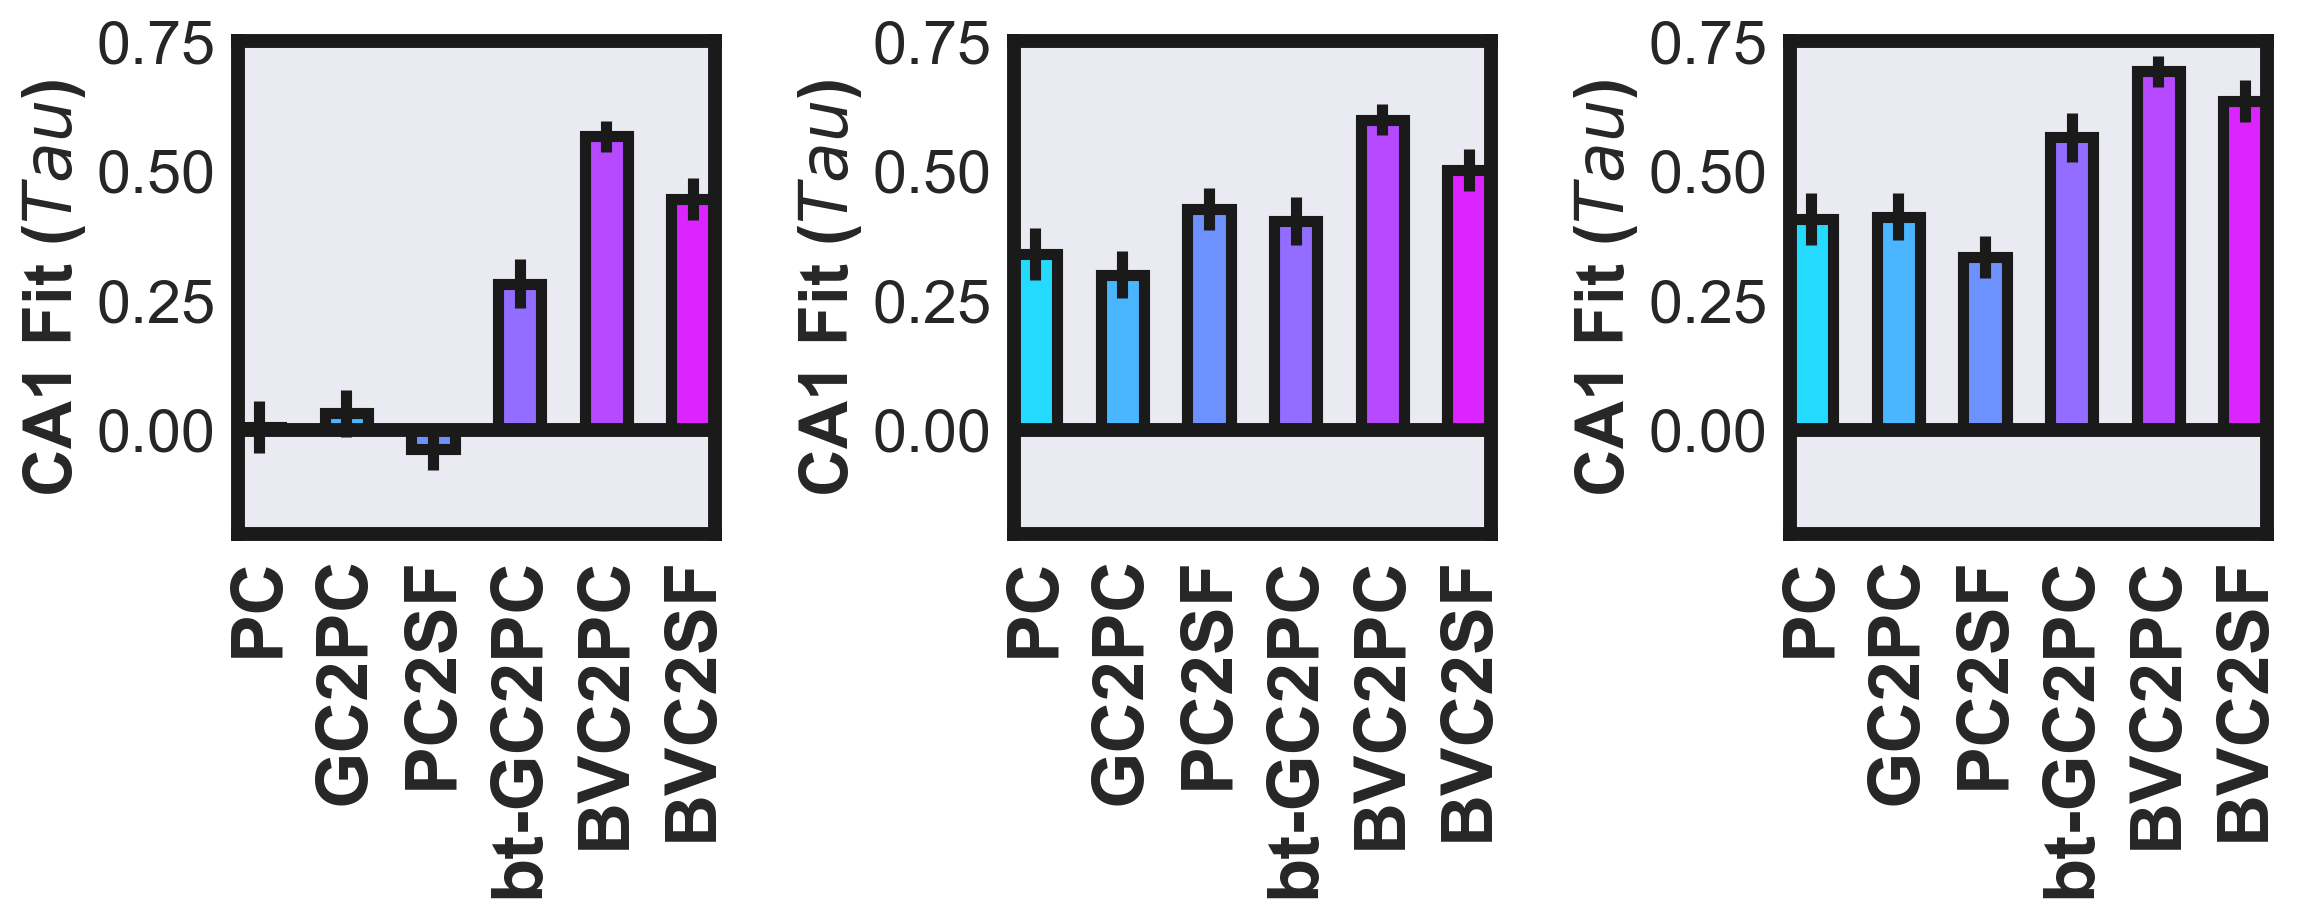

In [55]:

## How do the models fit different sets of comparisons - same environment/different partitions; different environmet
# same partitions; different environment/different partitions?

rsm_parts_animals = get_rsm_partitioned_sequences(animals, agg=False, p=os.path.join(p, "data"))

# create boolean masks for matching and nonmatching partitions allocentrically using cannon labels
cannon_labels = rsm_parts_animals["cannon_labels"]
parts_mesh = np.meshgrid(cannon_labels[:, 1].astype(float), cannon_labels[:, 1].astype(float))
parts_match = parts_mesh[0] == parts_mesh[1]
parts_nonmatch = parts_mesh[0] != parts_mesh[1]

# then further break down nonmatch to same and different envirionments
same_env_mesh = np.meshgrid(cannon_labels[:, 0], cannon_labels[:, 0])
parts_nonmatch_senv = same_env_mesh[0] == same_env_mesh[1]
parts_nonmatch_senv[:9, 90:] = False
parts_nonmatch_senv[90:, :9] = False
parts_nonmatch_senv[np.eye(parts_nonmatch_senv.shape[0]).astype(bool)] = False
parts_nonmatch_denv = deepcopy(parts_nonmatch)
parts_nonmatch_denv[parts_nonmatch_senv] = False
parts_match_denv = deepcopy(parts_match)
parts_match_denv[np.eye(parts_match.shape[0]).astype(bool)] = False

# now compare parts_nonmatch_senv (diff parts, same env), parts_match_denv (diff env, same parts), and parts_nonmatch_denv (diff env, diff parts)
# to each of the hypotheses
rsm_mask = ~np.isnan(rsm_parts_averaged)
rsm_mask[np.tri(rsm_mask.shape[0], k=0).astype(bool)] = False

# how well does each hypothesis explain different partitions, same environment?
comp_masks = np.stack((np.logical_and(rsm_mask, parts_nonmatch_senv), np.logical_and(rsm_mask, parts_match_denv),
                       np.logical_and(rsm_mask, parts_nonmatch_denv)))
cols = ["Model", "Comparison", "Tau", "SE", "P value"]
df_hypo_comps = pd.DataFrame(data=np.zeros([comp_masks.shape[0] * len(feature_types), len(cols)]), columns=cols)
c = 0
for m, mask in enumerate(comp_masks):
    temp = deepcopy(rsm_parts_averaged)
    temp[~mask] = np.nan
    for f, feature_type in enumerate(feature_types):
        temp_model = deepcopy(rsm_models[feature_type]['averaged'])
        temp_model[~mask] = np.nan
        # fits = get_rsm_fit_bootstrap_verbose(temp.T, temp_model.T,
        #                                      n_bootstrap, method='Tau')
        fit, se, p_val = get_rsm_fit_bootstrap(temp.T, temp_model.T,
                                               method='Tau')
        if m == 0:
            comp_name = "SE-DP"
        elif m == 1:
            comp_name = "DE-SP"
        elif m == 2:
            comp_name = "DE-DP"
        df_hypo_comps.iloc[c] = np.hstack((feature_names[f], comp_name, fit, se, p_val))
        c+=1
df_hypo_comps["Tau"] = df_hypo_comps["Tau"].astype(float)
df_hypo_comps["SE"] = df_hypo_comps["SE"].astype(float)


sns.set(style='dark', font_scale=2.)
fig = plt.figure(figsize=(12, 5))

ax = plt.subplot(131)
bp = sns.barplot(data=df_hypo_comps[df_hypo_comps["Comparison"] == "SE-DP"],
                 x=df_hypo_comps["Model"][df_hypo_comps["Comparison"] == "SE-DP"],
                 y=df_hypo_comps["Tau"][df_hypo_comps["Comparison"] == "SE-DP"], width=.5,
                 saturation=1., palette='cool', edgecolor='k', linewidth=4, errcolor='k', errwidth=0.)
for pt, patch in enumerate(bp.patches):
    plt.errorbar(x=patch.get_x() + .25, y=patch.get_height(), yerr=df_hypo_comps['SE'].iloc[pt], c='k',
                 linewidth=4.)
# ax.axhline(np.mean(noise_margin_agg[:, 0], axis=0), c='k', linewidth=4.0, alpha=.6)
ax.set_ylim([-.2, .75])
ax.set_ylabel("CA1 Fit ($Tau$)", weight='bold')
ax.axhline(0.0, c='k', linewidth=5.)
ax.set_xticks(np.arange(len(feature_names)))
ax.set_xticklabels(feature_names, weight='bold', fontsize=26, rotation=90)
ax.set_xlabel("")
plt.setp(ax.spines.values(), color='k', linewidth=5)

ax = plt.subplot(132)
bp = sns.barplot(data=df_hypo_comps[df_hypo_comps["Comparison"] == "DE-SP"],
                 x=df_hypo_comps["Model"][df_hypo_comps["Comparison"] == "DE-SP"],
                 y=df_hypo_comps["Tau"][df_hypo_comps["Comparison"] == "DE-SP"], width=.5,
                 saturation=1., palette='cool', edgecolor='k', linewidth=4, errcolor='k', errwidth=0.)
for pt, patch in enumerate(bp.patches):
    plt.errorbar(x=patch.get_x() + .25, y=patch.get_height(), yerr=df_hypo_comps['SE'].iloc[pt], c='k',
                 linewidth=4.)
# ax.axhline(np.mean(noise_margin_agg[:, 0], axis=0), c='blue', linewidth=4.0, alpha=.6)
ax.set_ylim([-.2, .75])
ax.set_ylabel("CA1 Fit ($Tau$)", weight='bold')
ax.axhline(0.0, c='k', linewidth=5.)
ax.set_xticks(np.arange(len(feature_names)))
ax.set_xticklabels(feature_names, weight='bold', fontsize=26, rotation=90)
ax.set_xlabel("")
plt.setp(ax.spines.values(), color='k', linewidth=5)


ax = plt.subplot(133)
bp = sns.barplot(data=df_hypo_comps[df_hypo_comps["Comparison"] == "DE-DP"],
                 x=df_hypo_comps["Model"][df_hypo_comps["Comparison"] == "DE-DP"],
                 y=df_hypo_comps["Tau"][df_hypo_comps["Comparison"] == "DE-DP"], width=.5,
                 saturation=1., palette='cool', edgecolor='k', linewidth=4, errcolor='k', errwidth=0.)
for pt, patch in enumerate(bp.patches):
    plt.errorbar(x=patch.get_x() + .25, y=patch.get_height(), yerr=df_hypo_comps['SE'].iloc[pt], c='k',
                 linewidth=4.)
# ax.axhline(np.mean(noise_margin_agg[:, 0], axis=0), c='blue', linewidth=4.0, alpha=.6)
ax.set_ylim([-.2, .75])
ax.set_ylabel("CA1 Fit ($Tau$)", weight='bold')
ax.axhline(0.0, c='k', linewidth=5.)
ax.set_xticks(np.arange(len(feature_names)))
ax.set_xticklabels(feature_names, weight='bold', fontsize=26, rotation=90)
ax.set_xlabel("")
plt.setp(ax.spines.values(), color='k', linewidth=5)

plt.tight_layout()
plt.show()

fig.savefig(os.path.join(p, "Figures", "rsm_model_comparison_conditions.svg"))
fig.savefig(os.path.join(p, "Figures", "rsm_model_comparison_conditions.png"), dpi=300)


In [56]:
rsm_models = joblib.load(os.path.join(p, "data", "riab_agent_bases", "rsm_models"))
n_bootstrap = 100
cols = ["Model", "Comparison", "Tau"]
df_hypo_comps = pd.DataFrame(data=np.zeros([comp_masks.shape[0] * len(feature_types) * n_bootstrap, len(cols)]),
                             columns=cols)
c = 0
for m, mask in enumerate(comp_masks):
    temp = deepcopy(rsm_parts_averaged)
    temp[~mask] = np.nan
    for f, feature_type in enumerate(feature_types):
        temp_model = deepcopy(rsm_models[feature_type]['averaged'])
        temp_model[~mask] = np.nan
        fits = get_rsm_fit_bootstrap_verbose(temp.T, temp_model.T,
                                             n_bootstrap, method='Tau')
        # fit, se, p_val = get_rsm_fit_bootstrap(temp.T, temp_model.T,
        #                                        method='Tau')
        if m == 0:
            comp_name = "SE-DP"
        elif m == 1:
            comp_name = "DE-SP"
        elif m == 2:
            comp_name = "DE-DP"
        df_hypo_comps.iloc[c:c+n_bootstrap] = np.vstack((np.tile(feature_names[f], n_bootstrap),
                                                            np.tile(comp_name, n_bootstrap), fits)).T
        c+=n_bootstrap
df_hypo_comps["Tau"] = df_hypo_comps["Tau"].astype(float)
formula = 'Tau ~ C(Model) + C(Comparison) + C(Model):C(Comparison)'
lm = ols(formula, df_hypo_comps).fit()
print(f"Two-way ANOVA for effect of model and comparison type on predicting CA1 representation: \n{anova_lm(lm)}")

Two-way ANOVA for effect of model and comparison type on predicting CA1 representation: 
                            df     sum_sq    mean_sq             F  PR(>F)
C(Model)                   5.0  40.202754   8.040551   7859.009486     0.0
C(Comparison)              2.0  26.983590  13.491795  13187.174026     0.0
C(Model):C(Comparison)    10.0   8.443439   0.844344    825.280072     0.0
Residual                1782.0   1.823164   0.001023           NaN     NaN
